#  Раздел 1:  Библиотеки

In [ ]:
from gdown.download_folder import download
import pandas as pd
import zipfile, os
import datetime
import os
import shutil

#  Раздел 2:  Функции

In [ ]:
def calls_list_to_df(calls_list):

  datetime_list    = [] # список для 'Дата и время'
  from_number_list = [] # список для 'Номер абонента'
  to_number_list   = [] # список для 'Номер сотрудника'
  session_list     = [] # список для 'Идентификатор сессии звонка'

  # Проходим по списку записей звонков
  for call in calls_list:

    call_item_list = call.split('_')
    time_item_list = call_item_list[1].split('-')

    # Заполняем списки для столбцов
    datetime_list.append(call_item_list[0] + ' ' + time_item_list[0] + ':' + time_item_list[1] + ':' + time_item_list[2])
    from_number_list.append(call_item_list[3])
    to_number_list.append(call_item_list[5])
    session_list.append(call_item_list[7])

  # Собираем созданные списки в словарь
  calls_dict = dict.fromkeys(['Дата и время', 'Номер абонента', 'Номер сотрудника', 'Идентификатор сессии звонка', 'Файл записи звонка'], [])
  calls_dict['Дата и время']                = datetime_list
  calls_dict['Номер абонента']              = from_number_list
  calls_dict['Номер сотрудника']            = to_number_list
  calls_dict['Идентификатор сессии звонка'] = session_list
  calls_dict['Файл записи звонка']          = calls_list

  # Возвращаем датафрейм
  return pd.DataFrame(calls_dict)

#  Раздел ЖК "Headliner"

Классификация звонков Headliner

In [ ]:
import gdown
gdown. download('https://drive.google.com/uc?id=1om_ZmC0GzLAqmKv0Q2mhs3i-g03ZGn_8')


Downloading...
From: https://drive.google.com/uc?id=1om_ZmC0GzLAqmKv0Q2mhs3i-g03ZGn_8
To: /content/Headliner.csv
100%|██████████| 3.67M/3.67M [00:00<00:00, 152MB/s]


'Headliner.csv'

In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи звонков_хедлайнер-20231202T100415Z-001.zip'


Функция вывода ZIP-файла

In [ ]:
def calls_list_to_df(calls_list):

  datetime_list    = [] # список для 'Дата и время'
  from_number_list = [] # список для 'Номер абонента'
  to_number_list   = [] # список для 'Номер сотрудника'
  session_list     = [] # список для 'Идентификатор сессии звонка'

  # Проходим по списку записей звонков
  for call in calls_list:

    call_item_list = call.split('_')
    time_item_list = call_item_list[1].split('-')

    # Заполняем списки для столбцов
    datetime_list.append(call_item_list[0] + ' ' + time_item_list[0] + ':' + time_item_list[1] + ':' + time_item_list[2])
    from_number_list.append(call_item_list[3])
    to_number_list.append(call_item_list[5])
    session_list.append(call_item_list[7])

  # Собираем созданные списки в словарь
  calls_dict = dict.fromkeys(['Дата и время', 'Номер абонента', 'Номер сотрудника', 'Идентификатор сессии звонка', 'Файл записи звонка'], [])
  calls_dict['Дата и время']                = datetime_list
  calls_dict['Номер абонента']              = from_number_list
  calls_dict['Номер сотрудника']            = to_number_list
  calls_dict['Идентификатор сессии звонка'] = session_list
  calls_dict['Файл записи звонка']          = calls_list

  # Возвращаем датафрейм
  return pd.DataFrame(calls_dict)


In [ ]:
# Создаём датафрейм из списка записей звонков
Headliner_calls_df = calls_list_to_df(os.listdir('Записи звонков_хедлайнер'))
Headliner_calls_df.shape

(2055, 5)

In [ ]:
Headliner_calls_df
Headliner_calls_df.sort_values('Дата и время', inplace=True)
Headliner_calls_df.reset_index(drop=True, inplace=True)
Headliner_calls_df


,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-05-08 10:41:56.911054,79250817178,74959339929,2928050751,2023-05-08_10-41-56.911054_from_79250817178_to...
1,2023-05-08 11:43:52.513973,79827693228,0188880,2937971588,2023-05-08_11-43-52.513973_from_79827693228_to...
2,2023-05-08 12:34:46.730988,79622801999,0188880,2928807121,2023-05-08_12-34-46.730988_from_79622801999_to...
3,2023-05-08 12:35:55.567230,79622801999,0188880,2938080128,2023-05-08_12-35-55.567230_from_79622801999_to...
4,2023-05-08 12:51:38.868213,74997040921,0188880,2928283255,2023-05-08_12-51-38.868213_from_74997040921_to...
...,...,...,...,...,...
2050,2023-07-19 16:51:00.801138,79161024742,74959339902,3098339039,2023-07-19_16-51-00.801138_from_79161024742_to...
2051,2023-07-19 16:52:13.751207,79152403560,74959339929,3099003691,2023-07-19_16-52-13.751207_from_79152403560_to...
2052,2023-07-19 17:01:54.812316,79835094068,74959339902,3099032036,2023-07-19_17-01-54.812316_from_79835094068_to...
2053,2023-07-19 17:11:07.982207,79991345109,0188880,3098403244,2023-07-19_17-11-07.982207_from_79991345109_to...


Создание ДатаФрейма


In [ ]:
df = pd.read_csv('Headliner.csv', delimiter=';', on_bad_lines='skip', header = 4)
df.sort_values('Дата и время', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Статус,Тип,Дата и время,Номер абонента,Виртуальный номер,Рекламная кампания,Длительность звонка,Длительность ожидания ответа,Причина завершения,Сценарий,...,Домен реферера,Сайт,Оценка сотрудника,Внутренний звонок,ФИО контакта,Имя тренера,"Группа, выбранная посетителем",Регион номера абонента,Страна номера абонента,Контакт из CRM
0,Принятый,Звонок ВАТС,2023-05-01 09:42:34,7.977766e+10,74951060379,Медийная реклама // kvartirny-control // Спец,00:00:48,00:00:31,Сотрудник разорвал соединение,.Последовательный обзвон,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
1,Принятый,Звонок ВАТС,2023-05-01 09:44:05,7.977766e+10,74951060379,Медийная реклама // kvartirny-control // Спец,00:08:33,00:00:01,Абонент разорвал соединение,.Последовательный обзвон,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
2,Потерянный,Динамический коллтрекинг,2023-05-01 09:52:15,7.800512e+10,74953202985,Яндекс Директ,00:00:03,00:00:03,Абонент разорвал соединение,.Последовательный обзвон,...,away.vk.com,head-liner.ru,NaN,Нет,NaN,NaN,NaN,Российская Федерация 8-800,РФ,NaN
3,Принятый,Звонок ВАТС,2023-05-01 11:10:12,7.917078e+10,74950854281,Офис заселения Хедлайнер,00:05:20,00:00:10,Абонент разорвал соединение,Офис заселения Хедлайнер,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,Республика Чувашия,РФ,NaN
4,Потерянный,Динамический коллтрекинг,2023-05-01 11:15:19,7.934400e+10,74951353644,Посетители без рекламной кампании,00:00:27,00:00:27,Абонент разорвал соединение,.Последовательный обзвон,...,head-liner.ru,head-liner.ru,NaN,Нет,NaN,NaN,NaN,РФ / не определено,РФ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,Принятый,Динамический коллтрекинг,2023-07-31 17:31:22,7.916771e+10,74951825873,Яндекс Директ,00:03:09,00:00:01,Сотрудник разорвал соединение,.Последовательный обзвон,...,suggest.sso.dzen.ru,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
4748,Потерянный,Звонок ВАТС,2023-07-31 17:52:01,7.495746e+10,74950212365,Номер на сайте,00:00:22,00:00:22,Не дозвонились до сотрудника,.Последовательный обзвон,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
4749,Принятый,Звонок ВАТС,2023-07-31 19:06:54,7.925784e+10,74951810000,Звонки_оффлайн,00:03:12,00:00:10,Абонент разорвал соединение,.Последовательный обзвон,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
4750,Принятый,Звонок ВАТС,2023-07-31 19:57:08,7.966201e+10,74953202993,Базы // Avito,00:00:25,00:00:01,Абонент разорвал соединение,Кортрос,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,РФ / не определено,РФ,NaN


Предобработка ДатаФрейма

In [ ]:
# функция изменения формата записи номера телефона
def format_phone_number(number):
    return '{:.0f}'.format(number)
df['Номер абонента'] = df['Номер абонента'].apply(format_phone_number)


In [ ]:
# фильтруем по нужным колонкам
filtered_df = df.loc[df['Статус'].str.contains('Принятый'), ['Статус', 'Номер абонента', 'Длительность звонка', 'Теги', 'Идентификатор сессии звонка']]
# фильтруем по длительность разговора
filtered_df['Длительность звонка'] = pd.to_datetime(filtered_df['Длительность звонка'])
filtered_df['Длительность звонка'] = filtered_df['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:01:15').time()
filtered_df = filtered_df[filtered_df['Длительность звонка'] > threshold]
# Объединяем отфильтрованный датафрейм с Headliner_calls_df по столбцу 'Идентификатор сессии звонка'
filtered_df['Идентификатор сессии звонка'] = filtered_df['Идентификатор сессии звонка'].astype('str')
merged_df = pd.merge(filtered_df, Headliner_calls_df, on='Идентификатор сессии звонка', how='inner')
merged_df



,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79827693228,00:06:41,Первичный целевой - ипотека - студия - 3 очередь,2937971588,2023-05-08 11:43:52.513973,79827693228,0188880,2023-05-08_11-43-52.513973_from_79827693228_to...
1,Принятый,79622801999,00:01:47,Лид - 3 очередь - Условно целевой - 3-ком - от...,2938080128,2023-05-08 12:35:55.567230,79622801999,0188880,2023-05-08_12-35-55.567230_from_79622801999_to...
2,Принятый,79279152761,00:01:44,постпродажное обслуживание - Вторичный целевой,2928935657,2023-05-08 13:50:28.475837,79279152761,79191089861,2023-05-08_13-50-28.475837_from_79279152761_to...
3,Принятый,79261116646,00:03:51,Первичный целевой - 2 очередь - 3-ком,2928975097,2023-05-08 14:16:30.536713,79261116646,0188880,2023-05-08_14-16-30.536713_from_79261116646_to...
4,Принятый,79508730557,00:08:12,Первичный целевой - студия - 3 очередь - 1-ком,2939148092,2023-05-09 10:32:18.366336,79508730557,0188880,2023-05-09_10-32-18.366336_from_79508730557_to...
...,...,...,...,...,...,...,...,...,...
1048,Принятый,79133420036,00:07:33,повторная покупка - Вторичный целевой - 2 очер...,3101275942,2023-07-19 16:40:03.946099,79133420036,74959339902,2023-07-19_16-40-03.946099_from_79133420036_to...
1049,Принятый,79152403560,00:07:33,постпродажное обслуживание - Условно целевой -...,3099003691,2023-07-19 16:52:13.751207,79152403560,74959339929,2023-07-19_16-52-13.751207_from_79152403560_to...
1050,Принятый,79835094068,00:01:59,спорный - номер взят не дозвонились до ОП,3099032036,2023-07-19 17:01:54.812316,79835094068,74959339902,2023-07-19_17-01-54.812316_from_79835094068_to...
1051,Принятый,79991345109,00:01:36,спорный - нет соединения,3098403244,2023-07-19 17:11:07.982207,79991345109,0188880,2023-07-19_17-11-07.982207_from_79991345109_to...


Целевые звонки

In [ ]:
# Выбираем первичные целевые звонки
Headliner_initial_target = merged_df.loc[merged_df['Теги'].str.contains('Первичный целевой')].reset_index(drop=True)
Headliner_initial_target

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79827693228,00:06:41,Первичный целевой - ипотека - студия - 3 очередь,2937971588,2023-05-08 11:43:52.513973,79827693228,0188880,2023-05-08_11-43-52.513973_from_79827693228_to...
1,Принятый,79261116646,00:03:51,Первичный целевой - 2 очередь - 3-ком,2928975097,2023-05-08 14:16:30.536713,79261116646,0188880,2023-05-08_14-16-30.536713_from_79261116646_to...
2,Принятый,79508730557,00:08:12,Первичный целевой - студия - 3 очередь - 1-ком,2939148092,2023-05-09 10:32:18.366336,79508730557,0188880,2023-05-09_10-32-18.366336_from_79508730557_to...
3,Принятый,79096321475,00:05:30,Лид - Первичный целевой - интересует рассрочка...,2929465891,2023-05-09 14:30:38.161392,79096321475,74957898990,2023-05-09_14-30-38.161392_from_79096321475_to...
4,Принятый,79258813188,00:12:52,Первичный целевой - 2 очередь - 3-ком,2930211973,2023-05-09 17:03:41.886158,79258813188,0188880,2023-05-09_17-03-41.886158_from_79258813188_to...
...,...,...,...,...,...,...,...,...,...
341,Принятый,79219307318,00:03:50,интересуют скидки - Первичный целевой - 1 очер...,3100674442,2023-07-19 13:57:19.801007,79219307318,0188880,2023-07-19_13-57-19.801007_from_79219307318_to...
342,Принятый,79220358111,00:05:11,Первичный целевой - ипотека - студия - 3 очередь,3097523803,2023-07-19 14:10:41.321949,79220358111,0188880,2023-07-19_14-10-41.321949_from_79220358111_to...
343,Принятый,79150222108,00:01:23,Первичный целевой - студия - 3 очередь,3104358905,2023-07-19 15:40:22.410545,79150222108,74957898990,2023-07-19_15-40-22.410545_from_79150222108_to...
344,Принятый,79165544032,00:02:53,Первичный целевой - 2 очередь - 3 очередь - 2-ком,3098905381,2023-07-19 16:22:04.874835,79165544032,0188880,2023-07-19_16-22-04.874835_from_79165544032_to...


In [ ]:
# Выбираем вторичные целевые звонки
Headliner_secondary_target = merged_df.loc[merged_df['Теги'].str.contains('Вторичный целевой')].reset_index(drop=True)
Headliner_secondary_target


,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79279152761,00:01:44,постпродажное обслуживание - Вторичный целевой,2928935657,2023-05-08 13:50:28.475837,79279152761,79191089861,2023-05-08_13-50-28.475837_from_79279152761_to...
1,Принятый,79064011000,00:03:39,постпродажное обслуживание - Вторичный целевой,2929311247,2023-05-09 12:17:32.617113,79064011000,74959339902,2023-05-09_12-17-32.617113_from_79064011000_to...
2,Принятый,79670165153,00:05:11,Лид - Вторичный целевой - 2 очередь - 3 очеред...,2919520238,2023-05-09 17:51:30.193682,79670165153,0188880,2023-05-09_17-51-30.193682_from_79670165153_to...
3,Принятый,79115639000,00:05:50,Вторичный целевой - поиск офиса продаж,2930217007,2023-05-10 09:46:49.632110,79115639000,0188880,2023-05-10_09-46-49.632110_from_79115639000_to...
4,Принятый,79264597706,00:02:55,постпродажное обслуживание - Вторичный целевой,2930744767,2023-05-10 12:04:01.602916,79264597706,0188880,2023-05-10_12-04-01.602916_from_79264597706_to...
...,...,...,...,...,...,...,...,...,...
301,Принятый,79250364306,00:02:02,постпродажное обслуживание - Вторичный целевой,3097852516,2023-07-19 11:40:48.971273,79250364306,74959339929,2023-07-19_11-40-48.971273_from_79250364306_to...
302,Принятый,79025666293,00:01:47,постпродажное обслуживание - Вторичный целевой,3097704464,2023-07-19 13:51:35.189734,79025666293,74959339902,2023-07-19_13-51-35.189734_from_79025666293_to...
303,Принятый,79177707707,00:03:52,повторная покупка - Вторичный целевой - 2 очер...,3097503388,2023-07-19 14:06:48.710300,79177707707,0188880,2023-07-19_14-06-48.710300_from_79177707707_to...
304,Принятый,79167960707,00:11:48,Вторичный целевой - 2 очередь - 2-ком - балкон...,3098496016,2023-07-19 14:25:45.168279,79167960707,0188880,2023-07-19_14-25-45.168279_from_79167960707_to...


Нецелевые звонки

In [ ]:
Headliner_intarget = merged_df.loc[merged_df['Теги'].str.contains('Нецелевой')].reset_index(drop=True)
Headliner_intarget


,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79639641553,00:02:38,Нецелевой звонок - сотрудничество,2940892544,2023-05-10 11:56:49.809252,79639641553,0188880,2023-05-10_11-56-49.809252_from_79639641553_to...
1,Принятый,79263385777,00:01:36,Нецелевой звонок - ошибка,2951723736,2023-05-15 11:32:03.949839,79263385777,0188880,2023-05-15_11-32-03.949839_from_79263385777_to...
2,Принятый,79852102394,00:01:57,интересует только застройщик - Нецелевой звоно...,2968457960,2023-05-22 11:52:42.548491,79852102394,74959339902,2023-05-22_11-52-42.548491_from_79852102394_to...
3,Принятый,79245534532,00:04:54,Нецелевой звонок - сотрудничество,2945373714,2023-05-23 15:22:08.746884,79245534532,74959339902,2023-05-23_15-22-08.746884_from_79245534532_to...
4,Принятый,79245534532,00:01:53,Нецелевой звонок - сотрудничество,2958588087,2023-05-23 15:37:44.472943,79245534532,0188880,2023-05-23_15-37-44.472943_from_79245534532_to...
5,Принятый,79265189107,00:01:19,Нецелевой звонок - сотрудничество,2961295223,2023-05-24 16:49:29.390123,79265189107,0188880,2023-05-24_16-49-29.390123_from_79265189107_to...
6,Принятый,74955348539,00:01:28,Нецелевой звонок - ошибка,2970252209,2023-05-29 10:00:55.338126,74955348539,74997552563,2023-05-29_10-00-55.338126_from_74955348539_to...
7,Принятый,79299816569,00:01:18,Нецелевой звонок - сотрудничество,2956742506,2023-05-29 16:13:23.842025,79299816569,74959339929,2023-05-29_16-13-23.842025_from_79299816569_to...
8,Принятый,79663525666,00:01:28,Нецелевой звонок - ошибка,2974711727,2023-05-31 10:50:44.704990,79663525666,74997552563,2023-05-31_10-50-44.704990_from_79663525666_to...
9,Принятый,79858179464,00:03:34,Нецелевой звонок - сотрудничество,2996631312,2023-06-02 13:37:18.070379,79858179464,0188880,2023-06-02_13-37-18.070379_from_79858179464_to...


Новые записи звонков Headliner

In [ ]:
new_df = pd.read_excel('/content/drive/MyDrive/New Headliner.xlsx', header=4)
new_df.sort_values('Дата и время', inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df

,Статус,Тип,Дата и время,Номер абонента,Виртуальный номер,Рекламная кампания,Длительность звонка,Длительность ожидания ответа,Причина завершения,Сценарий,...,Домен реферера,Сайт,Оценка сотрудника,Внутренний звонок,ФИО контакта,Имя тренера,"Группа, выбранная посетителем",Регион номера абонента,Страна номера абонента,Контакт из CRM
0,Потерянный,Автоперезвон по заявкам,2023-08-23 01:07:56,0,74951626927,Посетители без рекламной кампании,00:12:16,00:12:16,Не дозвонились до сотрудника,Автоперезвон,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Звонок ВАТС,2023-08-23 09:11:37,79166964481,74950854280,ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,00:00:14,00:00:09,Сотрудник разорвал соединение,74959339929 ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
2,Принятый,Звонок ВАТС,2023-08-23 09:32:28,79161079278,74951063507,Базы // Яндекс Недвижимость,00:03:20,00:00:01,Абонент разорвал соединение,Кортрос,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
3,Принятый,Звонок ВАТС,2023-08-23 10:08:09,79166964481,74950854280,ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,00:00:45,00:00:09,Абонент разорвал соединение,74959339929 ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
4,Принятый,Звонок ВАТС,2023-08-23 10:15:04,79166964481,74950854280,ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,00:01:00,00:00:09,Абонент разорвал соединение,74959339929 ОТДЕЛ КЛИЕНТСКОГО СЕРВИСА Хедлайнер,...,NaN,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,Принятый,Динамический коллтрекинг,2023-10-05 10:20:50,79067910613,74951629501,Яндекс Директ,00:01:58,00:00:08,Сотрудник разорвал соединение,.Последовательный обзвон,...,yandex.ru,head-liner.ru,NaN,Нет,NaN,NaN,NaN,г. Москва,РФ,NaN
1538,Потерянный,Динамический коллтрекинг,2023-10-05 10:22:18,79235257654,74953249432,Поисковое продвижение,00:00:06,00:00:06,Абонент разорвал соединение,.Последовательный обзвон,...,www.google.com,head-liner.ru,NaN,Нет,NaN,NaN,NaN,Кемеровская обл.,РФ,NaN
1539,Принятый,Динамический коллтрекинг,2023-10-05 10:23:07,79235257654,74953249432,Поисковое продвижение,00:00:38,00:00:09,Абонент разорвал соединение,.Последовательный обзвон,...,www.google.com,head-liner.ru,NaN,Нет,NaN,NaN,NaN,Кемеровская обл.,РФ,NaN
1540,Принятый,Динамический коллтрекинг,2023-10-05 10:24:42,79235257654,74953249432,Поисковое продвижение,00:01:24,00:00:09,Абонент разорвал соединение,.Последовательный обзвон,...,www.google.com,head-liner.ru,NaN,Нет,NaN,NaN,NaN,Кемеровская обл.,РФ,NaN


In [ ]:
# фильтруем по нужным колонкам и только принятые звонки
filtered_new_df = new_df.loc[new_df['Статус'].str.contains('Принятый'), ['Статус', 'Номер абонента','Длительность звонка', 'Теги', 'Идентификатор сессии звонка']]

# фильтруем по длительность разговора
filtered_new_df['Длительность звонка'] = pd.to_datetime(filtered_new_df['Длительность звонка'])
filtered_new_df['Длительность звонка'] = filtered_new_df['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:01:15').time()
filtered_new_df = filtered_new_df[filtered_new_df['Длительность звонка'] > threshold]
filtered_new_df

,Статус,Номер абонента,Длительность звонка,Теги,Идентификатор сессии звонка
2,Принятый,79161079278,00:03:20,спорный - связь прервалась,3173130009
6,Принятый,79107373553,00:09:55,Первичный целевой - 3 очередь - 3-ком,3171008703
9,Принятый,79191006648,00:03:00,клиент просил перезвонить - Вторичный целевой ...,3180240872
17,Принятый,79858009161,00:03:24,Вторичный целевой - 2 очередь - интересует тре...,3170179025
18,Принятый,79123988128,00:03:08,Лид - Первичный целевой - 2 очередь - 3 очеред...,3170187115
...,...,...,...,...,...
1534,Принятый,79154168876,00:02:57,NaN,3270371969
1536,Принятый,79587884703,00:01:19,NaN,3277405642
1537,Принятый,79067910613,00:01:58,NaN,3277397412
1540,Принятый,79235257654,00:01:24,NaN,3277407497


In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи Headliner-20231202T101949Z-001.zip'

In [ ]:
# Создаём датафрейм из списка записей звонков
New_Headliner_calls_df = calls_list_to_df(os.listdir('Записи Headliner'))
New_Headliner_calls_df.shape

(1226, 5)

In [ ]:
New_Headliner_calls_df.sort_values('Дата и время', inplace=True)
New_Headliner_calls_df.reset_index(drop=True, inplace=True)
New_Headliner_calls_df


,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-08-23 09:11:45.552271,79166964481,74959339929,3169726155,2023-08-23_09-11-45.552271_from_79166964481_to...
1,2023-08-23 09:32:29.601200,79161079278,0188880,3173130009,2023-08-23_09-32-29.601200_from_79161079278_to...
2,2023-08-23 10:08:17.665887,79166964481,74959339929,3169874110,2023-08-23_10-08-17.665887_from_79166964481_to...
3,2023-08-23 10:15:13.526751,79166964481,74959339929,3180070252,2023-08-23_10-15-13.526751_from_79166964481_to...
4,2023-08-23 10:21:01.278658,79166964481,74959339929,3170962373,2023-08-23_10-21-01.278658_from_79166964481_to...
...,...,...,...,...,...
1221,2023-10-05 10:15:15.030289,74951626927,0188880,3277405642,2023-10-05_10-15-15.030289_from_74951626927_to...
1222,2023-10-05 10:20:57.881044,79067910613,74959339902,3277397412,2023-10-05_10-20-57.881044_from_79067910613_to...
1223,2023-10-05 10:23:16.177719,79235257654,74959339902,3270503799,2023-10-05_10-23-16.177719_from_79235257654_to...
1224,2023-10-05 10:24:51.279862,79235257654,74959339902,3277407497,2023-10-05_10-24-51.279862_from_79235257654_to...


In [ ]:
# Объединяем отфильтрованный датафрейм с Headliner_calls_df по столбцу 'Идентификатор сессии звонка'
filtered_new_df['Идентификатор сессии звонка'] = filtered_new_df['Идентификатор сессии звонка'].astype('str')
new_merged_df = pd.merge(filtered_new_df,New_Headliner_calls_df, on='Идентификатор сессии звонка', how='inner')
new_merged_df.dropna(inplace=True)
new_merged_df

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79161079278,00:03:20,спорный - связь прервалась,3173130009,2023-08-23 09:32:29.601200,79161079278,0188880,2023-08-23_09-32-29.601200_from_79161079278_to...
1,Принятый,79107373553,00:09:55,Первичный целевой - 3 очередь - 3-ком,3171008703,2023-08-23 10:33:29.479304,79107373553,0188880,2023-08-23_10-33-29.479304_from_79107373553_to...
2,Принятый,79191006648,00:03:00,клиент просил перезвонить - Вторичный целевой ...,3180240872,2023-08-23 10:53:40.062582,74950235903,0188880,2023-08-23_10-53-40.062582_from_74950235903_to...
3,Принятый,79858009161,00:03:24,Вторичный целевой - 2 очередь - интересует тре...,3170179025,2023-08-23 11:40:15.759104,79858009161,74957898990,2023-08-23_11-40-15.759104_from_79858009161_to...
4,Принятый,79123988128,00:03:08,Лид - Первичный целевой - 2 очередь - 3 очеред...,3170187115,2023-08-23 11:41:28.642199,79123988128,0188880,2023-08-23_11-41-28.642199_from_79123988128_to...
...,...,...,...,...,...,...,...,...,...
661,Принятый,79670313400,00:01:52,Лид - номер взят не дозвонились до ОП - 3-ком,3253756915,2023-10-04 15:40:27.941227,79670313400,0188880,2023-10-04_15-40-27.941227_from_79670313400_to...
662,Принятый,79214488892,00:02:25,спорный - нет соединения,3269231014,2023-10-04 15:42:21.598098,79214488892,0188880,2023-10-04_15-42-21.598098_from_79214488892_to...
663,Принятый,79852427172,00:08:05,постпродажное обслуживание - Вторичный целевой,3263931238,2023-10-04 16:49:03.887398,79852427172,0188880,2023-10-04_16-49-03.887398_from_79852427172_to...
664,Принятый,79254460225,00:01:27,Лид - спорный - номер взят не дозвонились до ...,3272420706,2023-10-04 17:10:21.495811,79254460225,0188880,2023-10-04_17-10-21.495811_from_79254460225_to...


In [ ]:
# Выбираем нецелевые звонки
New_Headliner_intarget = new_merged_df.loc[new_merged_df['Теги'].str.contains('Нецелевой')].reset_index(drop=True, )
New_Headliner_intarget

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79651585925,00:05:21,Лид - не проходит по бюджету - Нецелевой звоно...,3178058696,2023-08-24 14:56:25.283010,79651585925,0188880,2023-08-24_14-56-25.283010_from_79651585925_to...
1,Принятый,79674530177,00:01:21,Нецелевой звонок - не интересует объект,3182699474,2023-08-27 14:45:20.189635,79674530177,0188880,2023-08-27_14-45-20.189635_from_79674530177_to...
2,Принятый,79775540528,00:03:02,Нецелевой звонок - сотрудничество,3190864137,2023-08-28 10:52:58.015992,79775540528,0188880,2023-08-28_10-52-58.015992_from_79775540528_to...
3,Принятый,74952603576,00:01:19,Нецелевой звонок - сотрудничество,3188170354,2023-08-29 17:34:39.496084,74952603576,74957898990,2023-08-29_17-34-39.496084_from_74952603576_to...
4,Принятый,79851881681,00:03:34,Нецелевой звонок - ошибка,3197989102,2023-08-30 19:00:34.303589,79851881681,0188880,2023-08-30_19-00-34.303589_from_79851881681_to...
5,Принятый,79775540528,00:04:06,Нецелевой звонок - сотрудничество,3189356688,2023-08-31 12:46:57.458256,79775540528,74959339902,2023-08-31_12-46-57.458256_from_79775540528_to...
6,Принятый,79772682407,00:01:52,интересует аренда - Коммерческая недвижимость ...,3199719397,2023-08-31 14:29:29.704326,79772682407,74959339929,2023-08-31_14-29-29.704326_from_79772682407_to...
7,Принятый,79253332314,00:09:02,Нецелевой звонок - жалоба,3199915243,2023-09-05 17:33:25.123136,79253332314,74959339929,2023-09-05_17-33-25.123136_from_79253332314_to...
8,Принятый,79653104477,00:01:37,Другой объект - Нецелевой звонок - ошибка,3206551381,2023-09-06 12:40:52.479642,79653104477,0188880,2023-09-06_12-40-52.479642_from_79653104477_to...
9,Принятый,79046106000,00:02:46,Нецелевой звонок - не интересует объект,3207564169,2023-09-07 13:01:00.678715,79046106000,0188880,2023-09-07_13-01-00.678715_from_79046106000_to...


In [ ]:
# Выбираем первичные целевые звонки
New_Headliner_initial_target = new_merged_df.loc[new_merged_df['Теги'].str.contains('Первичный целевой')].reset_index(drop=True)
New_Headliner_initial_target

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79107373553,00:09:55,Первичный целевой - 3 очередь - 3-ком,3171008703,2023-08-23 10:33:29.479304,79107373553,0188880,2023-08-23_10-33-29.479304_from_79107373553_to...
1,Принятый,79123988128,00:03:08,Лид - Первичный целевой - 2 очередь - 3 очеред...,3170187115,2023-08-23 11:41:28.642199,79123988128,0188880,2023-08-23_11-41-28.642199_from_79123988128_to...
2,Принятый,79169974246,00:03:30,Первичный целевой - запись на просмотр - 3 оче...,3173969884,2023-08-23 13:18:08.635820,79169974246,0188880,2023-08-23_13-18-08.635820_from_79169974246_to...
3,Принятый,79823694225,00:09:09,Первичный целевой - 2 очередь - ипотека - 3 оч...,3170558335,2023-08-23 13:36:58.006570,79823694225,0188880,2023-08-23_13-36-58.006570_from_79823694225_to...
4,Принятый,79035582226,00:09:59,Первичный целевой - ипотека - 3 очередь - 2-ком,3176274176,2023-08-23 19:02:57.361468,79035582226,0188880,2023-08-23_19-02-57.361468_from_79035582226_to...
...,...,...,...,...,...,...,...,...,...
184,Принятый,79067770755,00:01:57,Первичный целевой - ипотека - 3 очередь - 1-ком,3261544519,2023-10-01 11:38:34.452945,79067770755,74959339902,2023-10-01_11-38-34.452945_from_79067770755_to...
185,Принятый,79241400900,00:02:52,Первичный целевой - 3 очередь - 2-ком,3257922518,2023-10-02 11:49:49.254412,79241400900,0188880,2023-10-02_11-49-49.254412_from_79241400900_to...
186,Принятый,79773296199,00:05:26,Первичный целевой - запись на просмотр - 3 оче...,3248669210,2023-10-02 12:07:07.880403,79773296199,74959339902,2023-10-02_12-07-07.880403_from_79773296199_to...
187,Принятый,79279961017,00:02:23,Первичный целевой - ипотека - интерес к объект...,3263598974,2023-10-02 13:18:56.418763,79279961017,74959339902,2023-10-02_13-18-56.418763_from_79279961017_to...


In [ ]:
# Выбираем вторичные целевые звонки
New_Headliner_secondary_target = new_merged_df.loc[new_merged_df['Теги'].str.contains('Вторичный целевой')].reset_index(drop=True)
New_Headliner_secondary_target

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79191006648,00:03:00,клиент просил перезвонить - Вторичный целевой ...,3180240872,2023-08-23 10:53:40.062582,74950235903,0188880,2023-08-23_10-53-40.062582_from_74950235903_to...
1,Принятый,79858009161,00:03:24,Вторичный целевой - 2 очередь - интересует тре...,3170179025,2023-08-23 11:40:15.759104,79858009161,74957898990,2023-08-23_11-40-15.759104_from_79858009161_to...
2,Принятый,79155770000,00:07:55,повторная покупка - Вторичный целевой - 3 очер...,3180748377,2023-08-23 12:58:39.315839,74951626927,0188880,2023-08-23_12-58-39.315839_from_74951626927_to...
3,Принятый,79893512808,00:02:37,постпродажное обслуживание - Вторичный целевой,3171724223,2023-08-23 13:41:15.621820,79893512808,74959339902,2023-08-23_13-41-15.621820_from_79893512808_to...
4,Принятый,79286102080,00:08:32,повторная покупка - Вторичный целевой - 2 очер...,3175143934,2023-08-23 19:48:18.700716,79286102080,74957898990,2023-08-23_19-48-18.700716_from_79286102080_to...
...,...,...,...,...,...,...,...,...,...
144,Принятый,79892761529,00:06:15,постпродажное обслуживание - Вторичный целевой,3251717480,2023-10-03 16:18:06.255333,79892761529,74959339902,2023-10-03_16-18-06.255333_from_79892761529_to...
145,Принятый,79282288822,00:01:50,постпродажное обслуживание - Вторичный целевой,3266884539,2023-10-03 16:24:14.862260,79282288822,0188880,2023-10-03_16-24-14.862260_from_79282288822_to...
146,Принятый,79257316906,00:01:31,постпродажное обслуживание - Вторичный целевой,3268558864,2023-10-04 12:41:25.281750,79257316906,74959339902,2023-10-04_12-41-25.281750_from_79257316906_to...
147,Принятый,79853123635,00:02:00,постпродажное обслуживание - Вторичный целевой,3276078997,2023-10-04 15:26:25.688569,79853123635,0188880,2023-10-04_15-26-25.688569_from_79853123635_to...


In [ ]:
# соединяем в общий список целевые звонки
Headliner_initial_target_summ = pd.concat([Headliner_initial_target, New_Headliner_initial_target])
Headliner_initial_target_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79827693228,00:06:41,Первичный целевой - ипотека - студия - 3 очередь,2937971588,2023-05-08 11:43:52.513973,79827693228,0188880,2023-05-08_11-43-52.513973_from_79827693228_to...
1,Принятый,79261116646,00:03:51,Первичный целевой - 2 очередь - 3-ком,2928975097,2023-05-08 14:16:30.536713,79261116646,0188880,2023-05-08_14-16-30.536713_from_79261116646_to...
2,Принятый,79508730557,00:08:12,Первичный целевой - студия - 3 очередь - 1-ком,2939148092,2023-05-09 10:32:18.366336,79508730557,0188880,2023-05-09_10-32-18.366336_from_79508730557_to...
3,Принятый,79096321475,00:05:30,Лид - Первичный целевой - интересует рассрочка...,2929465891,2023-05-09 14:30:38.161392,79096321475,74957898990,2023-05-09_14-30-38.161392_from_79096321475_to...
4,Принятый,79258813188,00:12:52,Первичный целевой - 2 очередь - 3-ком,2930211973,2023-05-09 17:03:41.886158,79258813188,0188880,2023-05-09_17-03-41.886158_from_79258813188_to...
...,...,...,...,...,...,...,...,...,...
184,Принятый,79067770755,00:01:57,Первичный целевой - ипотека - 3 очередь - 1-ком,3261544519,2023-10-01 11:38:34.452945,79067770755,74959339902,2023-10-01_11-38-34.452945_from_79067770755_to...
185,Принятый,79241400900,00:02:52,Первичный целевой - 3 очередь - 2-ком,3257922518,2023-10-02 11:49:49.254412,79241400900,0188880,2023-10-02_11-49-49.254412_from_79241400900_to...
186,Принятый,79773296199,00:05:26,Первичный целевой - запись на просмотр - 3 оче...,3248669210,2023-10-02 12:07:07.880403,79773296199,74959339902,2023-10-02_12-07-07.880403_from_79773296199_to...
187,Принятый,79279961017,00:02:23,Первичный целевой - ипотека - интерес к объект...,3263598974,2023-10-02 13:18:56.418763,79279961017,74959339902,2023-10-02_13-18-56.418763_from_79279961017_to...


In [ ]:
# соединяем в общий список вторичные целевые звонки
Headliner_secondary_target_summ = pd.concat([Headliner_secondary_target, New_Headliner_secondary_target])
Headliner_secondary_target_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79279152761,00:01:44,постпродажное обслуживание - Вторичный целевой,2928935657,2023-05-08 13:50:28.475837,79279152761,79191089861,2023-05-08_13-50-28.475837_from_79279152761_to...
1,Принятый,79064011000,00:03:39,постпродажное обслуживание - Вторичный целевой,2929311247,2023-05-09 12:17:32.617113,79064011000,74959339902,2023-05-09_12-17-32.617113_from_79064011000_to...
2,Принятый,79670165153,00:05:11,Лид - Вторичный целевой - 2 очередь - 3 очеред...,2919520238,2023-05-09 17:51:30.193682,79670165153,0188880,2023-05-09_17-51-30.193682_from_79670165153_to...
3,Принятый,79115639000,00:05:50,Вторичный целевой - поиск офиса продаж,2930217007,2023-05-10 09:46:49.632110,79115639000,0188880,2023-05-10_09-46-49.632110_from_79115639000_to...
4,Принятый,79264597706,00:02:55,постпродажное обслуживание - Вторичный целевой,2930744767,2023-05-10 12:04:01.602916,79264597706,0188880,2023-05-10_12-04-01.602916_from_79264597706_to...
...,...,...,...,...,...,...,...,...,...
144,Принятый,79892761529,00:06:15,постпродажное обслуживание - Вторичный целевой,3251717480,2023-10-03 16:18:06.255333,79892761529,74959339902,2023-10-03_16-18-06.255333_from_79892761529_to...
145,Принятый,79282288822,00:01:50,постпродажное обслуживание - Вторичный целевой,3266884539,2023-10-03 16:24:14.862260,79282288822,0188880,2023-10-03_16-24-14.862260_from_79282288822_to...
146,Принятый,79257316906,00:01:31,постпродажное обслуживание - Вторичный целевой,3268558864,2023-10-04 12:41:25.281750,79257316906,74959339902,2023-10-04_12-41-25.281750_from_79257316906_to...
147,Принятый,79853123635,00:02:00,постпродажное обслуживание - Вторичный целевой,3276078997,2023-10-04 15:26:25.688569,79853123635,0188880,2023-10-04_15-26-25.688569_from_79853123635_to...


In [ ]:
# соединяем в общий список нецелевые звонки
Headliner_intarget_summ = pd.concat([Headliner_intarget, New_Headliner_intarget])
Headliner_intarget_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,79639641553,00:02:38,Нецелевой звонок - сотрудничество,2940892544,2023-05-10 11:56:49.809252,79639641553,0188880,2023-05-10_11-56-49.809252_from_79639641553_to...
1,Принятый,79263385777,00:01:36,Нецелевой звонок - ошибка,2951723736,2023-05-15 11:32:03.949839,79263385777,0188880,2023-05-15_11-32-03.949839_from_79263385777_to...
2,Принятый,79852102394,00:01:57,интересует только застройщик - Нецелевой звоно...,2968457960,2023-05-22 11:52:42.548491,79852102394,74959339902,2023-05-22_11-52-42.548491_from_79852102394_to...
3,Принятый,79245534532,00:04:54,Нецелевой звонок - сотрудничество,2945373714,2023-05-23 15:22:08.746884,79245534532,74959339902,2023-05-23_15-22-08.746884_from_79245534532_to...
4,Принятый,79245534532,00:01:53,Нецелевой звонок - сотрудничество,2958588087,2023-05-23 15:37:44.472943,79245534532,0188880,2023-05-23_15-37-44.472943_from_79245534532_to...
...,...,...,...,...,...,...,...,...,...
23,Принятый,74959873447,00:01:32,Нецелевой звонок - сотрудничество,3248035173,2023-09-27 12:58:28.635862,74959873447,0188880,2023-09-27_12-58-28.635862_from_74959873447_to...
24,Принятый,79252222243,00:02:59,Нецелевой звонок - сотрудничество,3250651398,2023-09-28 13:27:14.565513,79252222243,74959339929,2023-09-28_13-27-14.565513_from_79252222243_to...
25,Принятый,79262150894,00:04:00,Нецелевой звонок - сотрудничество,3272565107,2023-10-03 11:16:10.273167,79262150894,0188880,2023-10-03_11-16-10.273167_from_79262150894_to...
26,Принятый,79262150894,00:12:37,Нецелевой звонок - сотрудничество,3251250590,2023-10-03 14:11:05.937242,79262150894,74959339902,2023-10-03_14-11-05.937242_from_79262150894_to...


#  Раздел  ЖК"Павелецкая сити"

In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи звонков_павелецкая сити-20231202T110518Z-001.zip'

In [ ]:
# Создаём датафрейм из списка записей звонков
Paveletskaja_calls_df = calls_list_to_df(os.listdir('Записи звонков_павелецкая сити'))
Paveletskaja_calls_df.shape

(1000, 5)

In [ ]:
Paveletskaja_calls_df.sort_values('Дата и время', inplace=True)
Paveletskaja_calls_df.reset_index(drop=True, inplace=True)
Paveletskaja_calls_df

,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-06-17 12:54:28.210462,79803286601,74950216267,3029638181,2023-06-17_12-54-28.210462_from_79803286601_to...
1,2023-06-17 13:44:17.539114,79066743768,74950216267,3029352265,2023-06-17_13-44-17.539114_from_79066743768_to...
2,2023-06-17 14:08:51.827169,74993205445,74955141111,3029390475,2023-06-17_14-08-51.827169_from_74993205445_to...
3,2023-06-17 14:21:31.493157,79259041087,74950216267,3029730813,2023-06-17_14-21-31.493157_from_79259041087_to...
4,2023-06-17 16:16:05.571252,79680303488,74950216267,3029596520,2023-06-17_16-16-05.571252_from_79680303488_to...
...,...,...,...,...,...
995,2023-07-20 11:33:48.269480,79168455509,74955141111,3099626809,2023-07-20_11-33-48.269480_from_79168455509_to...
996,2023-07-20 11:36:59.633997,79169021186,74950216267,3100336231,2023-07-20_11-36-59.633997_from_79169021186_to...
997,2023-07-20 11:37:11.094292,79099624838,74950216267,3105745185,2023-07-20_11-37-11.094292_from_79099624838_to...
998,2023-07-20 11:37:36.619972,79112808417,74955141111,3100336696,2023-07-20_11-37-36.619972_from_79112808417_to...


In [ ]:
Paveletskaja_df = pd.read_csv('/content/drive/MyDrive/Павелецкая_ЖК_"Павелецкая_сити".csv', delimiter=';', on_bad_lines='skip', header = 4)
Paveletskaja_df.sort_values('Дата и время', inplace=True)
Paveletskaja_df.reset_index(drop=True, inplace=True)
Paveletskaja_df

,Статус,Тип,Дата и время,Номер абонента,Длительность ожидания ответа,Сотрудник,Рекламная кампания,Номер обращения,Длительность звонка,Теги,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Принятый,Аналитика,2023-05-01 10:45:48,7.926389e+10,00:00:01,SIP URI,Artics | Павелецкая Сити | xml | avito.ru,1.0,00:17:41,NaN,...,00:17:40,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Аналитика,2023-05-01 10:48:24,7.705526e+10,00:00:03,74955141111,MRGroup | Павелецкая Сити | direct | Яндекс.Ди...,1.0,00:00:18,Нецелевой контакт,...,00:00:15,00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Аналитика,2023-05-01 12:24:40,7.977520e+10,00:00:01,74955141111,Artics | Павелецкая Сити | maps | Яндекс.Карты,1.0,00:05:21,NaN,...,00:05:20,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Аналитика,2023-05-01 13:54:40,7.926336e+10,00:00:01,SIP URI,Artics | Павелецкая Сити | xml | yandex.realty.ru,1.0,00:00:42,NaN,...,00:00:41,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Принятый,Аналитика,2023-05-01 14:15:40,7.903745e+10,00:00:01,SIP URI,Artics | Павелецкая Сити | cpa | reffection,1.0,00:07:49,NaN,...,00:07:48,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Принятый,Динамический коллтрекинг,2023-07-31 19:16:16,7.903720e+10,00:00:01,74955141111,Media108 | Павелецкая Сити | direct | Яндекс.Д...,9.0,00:05:08,NaN,...,00:05:07,00:00:01,NaN,yandex,m108_pavcity_brand_search_mmo|87584869,cpc,id|44890473306_44890473306|cid|87584869|gid|52...,жк павелецкая сити,NaN,NaN
9314,Принятый,Автоперезвон по заявкам,2023-07-31 19:18:04,7.999348e+10,00:00:40,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,60.0,00:00:45,NaN,...,00:00:05,00:00:40,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
9315,Потерянный,Автоперезвон по заявкам,2023-07-31 19:21:06,7.999348e+10,00:00:36,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,63.0,00:00:36,Не обработано - Нецелевой контакт,...,00:00:00,00:00:36,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
9316,Принятый,Аналитика,2023-07-31 19:52:57,7.905524e+10,00:00:02,74955141111,MRGroup | Павелецкая Сити | seo | Google Поиск,1.0,00:04:06,Целевой_М108,...,00:04:04,00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# функция изменения формата записи номера телефона
def format_phone_number(number):
    return '{:.0f}'.format(number)
Paveletskaja_df['Номер абонента'] = Paveletskaja_df['Номер абонента'].apply(format_phone_number)
Paveletskaja_df

,Статус,Тип,Дата и время,Номер абонента,Длительность ожидания ответа,Сотрудник,Рекламная кампания,Номер обращения,Длительность звонка,Теги,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Принятый,Аналитика,2023-05-01 10:45:48,79263888778,00:00:01,SIP URI,Artics | Павелецкая Сити | xml | avito.ru,1.0,00:17:41,NaN,...,00:17:40,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Аналитика,2023-05-01 10:48:24,77055259984,00:00:03,74955141111,MRGroup | Павелецкая Сити | direct | Яндекс.Ди...,1.0,00:00:18,Нецелевой контакт,...,00:00:15,00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Аналитика,2023-05-01 12:24:40,79775196373,00:00:01,74955141111,Artics | Павелецкая Сити | maps | Яндекс.Карты,1.0,00:05:21,NaN,...,00:05:20,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Аналитика,2023-05-01 13:54:40,79263355183,00:00:01,SIP URI,Artics | Павелецкая Сити | xml | yandex.realty.ru,1.0,00:00:42,NaN,...,00:00:41,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Принятый,Аналитика,2023-05-01 14:15:40,79037453850,00:00:01,SIP URI,Artics | Павелецкая Сити | cpa | reffection,1.0,00:07:49,NaN,...,00:07:48,00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Принятый,Динамический коллтрекинг,2023-07-31 19:16:16,79037201544,00:00:01,74955141111,Media108 | Павелецкая Сити | direct | Яндекс.Д...,9.0,00:05:08,NaN,...,00:05:07,00:00:01,NaN,yandex,m108_pavcity_brand_search_mmo|87584869,cpc,id|44890473306_44890473306|cid|87584869|gid|52...,жк павелецкая сити,NaN,NaN
9314,Принятый,Автоперезвон по заявкам,2023-07-31 19:18:04,79993482013,00:00:40,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,60.0,00:00:45,NaN,...,00:00:05,00:00:40,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
9315,Потерянный,Автоперезвон по заявкам,2023-07-31 19:21:06,79993480367,00:00:36,Обратный звонок (SIP<1),Media108 | Павелецкая Сити | direct | Яндекс.Д...,63.0,00:00:36,Не обработано - Нецелевой контакт,...,00:00:00,00:00:36,NaN,yandex,m108_pavcity_brand_net_mmo|88281925,cpc,id|44896430393_44896430393|cid|88281925|gid|52...,павелецкая сити 3 и 4 очереди,NaN,NaN
9316,Принятый,Аналитика,2023-07-31 19:52:57,79055235742,00:00:02,74955141111,MRGroup | Павелецкая Сити | seo | Google Поиск,1.0,00:04:06,Целевой_М108,...,00:04:04,00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Paveletskaja_turbo_df = pd.read_csv('/content/drive/MyDrive/Павелецкая turbo_site.csv', delimiter=';', on_bad_lines='skip', header = 4)
Paveletskaja_turbo_df.sort_values('Дата и время', inplace=True)
Paveletskaja_turbo_df.reset_index(drop=True, inplace=True)
Paveletskaja_turbo_df

,Статус,Тип,Дата и время,Номер абонента,Длительность звонка,Длительность ожидания ответа,Сотрудник,ID посетителя,Номер обращения,Теги,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Принятый,Динамический коллтрекинг,2023-05-02 02:04:42,79025771096,00:00:06,00:00:02,7.495514e+10,7.089603e+09,4,Нецелевой контакт,...,00:00:04,00:00:02,NaN,yandex,ya_paveletskaya_rf_n_general,cpc,v2||53841693||11236182399||44050210624||жилье ...,жилье бизнес-класса,NaN,NaN
1,Принятый,Динамический коллтрекинг,2023-05-02 19:52:09,77779012504,00:01:00,00:00:02,7.495514e+10,7.071742e+09,1,NaN,...,00:00:58,00:00:02,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||13819492115||44050214991||компле...,комплекс москва москва,NaN,NaN
2,Принятый,Динамический коллтрекинг,2023-05-03 06:27:25,77058938377,00:00:14,00:00:03,7.495514e+10,7.096342e+09,1,Нецелевой контакт,...,00:00:11,00:00:03,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||11012716629||44050215065||---aut...,---autotargeting,NaN,NaN
3,Потерянный,Динамический коллтрекинг,2023-05-03 06:28:01,77058938377,00:00:00,00:00:00,NaN,7.096342e+09,2,Не обработано - Нецелевой контакт,...,00:00:00,00:00:00,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||11012716629||44050215065||---aut...,---autotargeting,NaN,NaN
4,Принятый,Динамический коллтрекинг,2023-05-03 16:43:18,79373021536,00:00:14,00:00:02,7.495514e+10,7.097844e+09,1,Нецелевой контакт,...,00:00:12,00:00:02,NaN,yandex,ya_paveletskaya_msk_r_retargeting,cpc,v2||50264576||11707218989||42082330||||0||none...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Принятый,Динамический коллтрекинг,2023-07-18 13:51:58,78005055934,00:00:02,00:00:01,7.495514e+10,7.046435e+09,2,Нецелевой контакт,...,00:00:01,00:00:01,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||11012716629||33325751427||купить...,купить двушку на юге москвы,NaN,NaN
1207,Принятый,Динамический коллтрекинг,2023-07-18 14:54:11,79680573141,00:01:00,00:00:01,7.495514e+10,7.107143e+09,1,NaN,...,00:00:59,00:00:01,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||13819492123||44050215064||---aut...,---autotargeting,NaN,NaN
1208,Принятый,Динамический коллтрекинг,2023-07-20 19:14:10,79331115364,00:00:23,00:00:01,7.495514e+10,7.470856e+09,1,Нецелевой контакт,...,00:00:22,00:00:01,NaN,yandex,ya_paveletskaya_msk_r_retargeting,cpc,v2||50264576||11707219000||42082330||||0||none...,NaN,NaN,NaN
1209,Принятый,Динамический коллтрекинг,2023-07-26 12:57:19,375295142037,00:00:10,00:00:03,7.495514e+10,7.147024e+09,1,Нецелевой контакт,...,00:00:07,00:00:03,NaN,yandex,ya_paveletskaya_kz_n_geo,cpc,v2||64424254||13819492116||44050215064||---aut...,---autotargeting,NaN,NaN


In [ ]:
# соединяем записи Павелецкая и Павелецкая_турбо
Paveletskaja_df1 = pd.concat([Paveletskaja_df, Paveletskaja_turbo_df]).reset_index(drop=True)
Paveletskaja_df1.shape



(10529, 74)

In [ ]:
# фильтруем по нужным колонкам с принятыми звонками
filtered_Paveletskaja_df1 = Paveletskaja_df.loc[Paveletskaja_df1['Статус'].str.contains('Принятый'), ['Статус','Дата и время', 'Номер абонента','Длительность звонка', 'Теги', 'Идентификатор сессии звонка']]
filtered_Paveletskaja_df1

,Статус,Дата и время,Номер абонента,Длительность звонка,Теги,Идентификатор сессии звонка
0,Принятый,2023-05-01 10:45:48,79263888778,00:17:41,NaN,2906141158
1,Принятый,2023-05-01 10:48:24,77055259984,00:00:18,Нецелевой контакт,2922837124
2,Принятый,2023-05-01 12:24:40,79775196373,00:05:21,NaN,2914969339
3,Принятый,2023-05-01 13:54:40,79263355183,00:00:42,NaN,2915780417
4,Принятый,2023-05-01 14:15:40,79037453850,00:07:49,NaN,2923295348
...,...,...,...,...,...,...
9310,Принятый,2023-07-31 18:05:38,79104936635,00:00:12,Нецелевой контакт,3126940540
9311,Принятый,2023-07-31 18:46:18,79274150147,00:00:04,Нецелевой контакт,3123073988
9313,Принятый,2023-07-31 19:16:16,79037201544,00:05:08,NaN,3124119339
9314,Принятый,2023-07-31 19:18:04,79993482013,00:00:45,NaN,3124131189


In [ ]:
# фильтруем по длительности звонка
filtered_Paveletskaja_df1['Длительность звонка'] = pd.to_datetime(filtered_Paveletskaja_df1['Длительность звонка'])
filtered_Paveletskaja_df1['Длительность звонка'] = filtered_Paveletskaja_df1['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:00:45').time()
filtered_Paveletskaja_df1 = filtered_Paveletskaja_df1[filtered_Paveletskaja_df1['Длительность звонка'] > threshold]
filtered_Paveletskaja_df1.reset_index(drop=True, inplace=True)
filtered_Paveletskaja_df1



,Статус,Дата и время,Номер абонента,Длительность звонка,Теги,Идентификатор сессии звонка
0,Принятый,2023-05-01 10:45:48,79263888778,00:17:41,NaN,2906141158
1,Принятый,2023-05-01 12:24:40,79775196373,00:05:21,NaN,2914969339
2,Принятый,2023-05-01 14:15:40,79037453850,00:07:49,NaN,2923295348
3,Принятый,2023-05-01 14:19:05,79615506325,00:05:04,NaN,2915829649
4,Принятый,2023-05-01 14:27:49,79652478156,00:00:50,NaN,2915849569
...,...,...,...,...,...,...
1714,Принятый,2023-07-31 16:10:35,79037432304,00:05:55,NaN,3122662023
1715,Принятый,2023-07-31 16:34:37,79260905555,00:03:47,NaN,3124420706
1716,Принятый,2023-07-31 17:44:50,79250011881,00:02:08,NaN,3126890805
1717,Принятый,2023-07-31 19:16:16,79037201544,00:05:08,NaN,3124119339


In [ ]:
# Объединяем отфильтрованный датафрейм  по столбцу 'Идентификатор сессии звонка'
filtered_Paveletskaja_df1['Идентификатор сессии звонка'] = filtered_Paveletskaja_df1['Идентификатор сессии звонка'].astype('str')
merged_Paveletskaja_df1 = pd.merge(filtered_Paveletskaja_df1, Paveletskaja_calls_df, on='Идентификатор сессии звонка', how='inner')
merged_Paveletskaja_df1.dropna(inplace=True)
merged_Paveletskaja_df1

<ipython-input-53-43f0deac0dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Paveletskaja_df1['Идентификатор сессии звонка'] = filtered_Paveletskaja_df1['Идентификатор сессии звонка'].astype('str')


,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-06-17 12:54:27,79803286601,00:08:37,Целевой_М108,3029638181,2023-06-17 12:54:28.210462,79803286601,74950216267,2023-06-17_12-54-28.210462_from_79803286601_to...
1,Принятый,2023-06-17 13:44:16,79066743768,00:01:33,Целевой_М108,3029352265,2023-06-17 13:44:17.539114,79066743768,74950216267,2023-06-17_13-44-17.539114_from_79066743768_to...
4,Принятый,2023-06-17 16:16:05,79680303488,00:06:40,Целевой_М108,3029596520,2023-06-17 16:16:05.571252,79680303488,74950216267,2023-06-17_16-16-05.571252_from_79680303488_to...
7,Принятый,2023-06-18 10:07:09,79151900879,00:12:13,Целевой_М108,3030608659,2023-06-18 10:07:09.396588,79151900879,74950216267,2023-06-18_10-07-09.396588_from_79151900879_to...
10,Принятый,2023-06-18 12:23:20,79139127673,00:14:02,Целевой_М108,3030815699,2023-06-18 12:23:21.133140,79139127673,74950216267,2023-06-18_12-23-21.133140_from_79139127673_to...
...,...,...,...,...,...,...,...,...,...,...
678,Принятый,2023-07-19 16:34:40,79107399908,00:07:39,Целевой_М108,3101262202,2023-07-19 16:34:41.005622,79107399908,74950216267,2023-07-19_16-34-41.005622_from_79107399908_to...
679,Принятый,2023-07-19 18:35:47,79261666111,00:03:37,Целевой_М108,3098337443,2023-07-19 18:35:48.781264,79261666111,74955141111,2023-07-19_18-35-48.781264_from_79261666111_to...
684,Принятый,2023-07-20 09:00:11,79872967236,00:01:24,Целевой_М108,3099136969,2023-07-20 09:00:46.604291,74950326372,0155649,2023-07-20_09-00-46.604291_from_74950326372_to...
685,Принятый,2023-07-20 10:39:51,79774804219,00:42:51,Целевой_М108,3099444274,2023-07-20 10:40:29.784078,74951069644,0155649,2023-07-20_10-40-29.784078_from_74951069644_to...


In [ ]:
# Выбираем нецелевые звонки
Paveletskaja_intarget = merged_Paveletskaja_df1.loc[merged_Paveletskaja_df1['Теги'].str.contains('Нецелевой')].reset_index(drop=True, )
Paveletskaja_intarget

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-07-12 16:04:09,79508234050,00:07:14,Нецелевой,3083319969,2023-07-12 16:04:10.104942,79508234050,74950216267,2023-07-12_16-04-10.104942_from_79508234050_to...


In [ ]:
Paveletskaja_initial_target = merged_Paveletskaja_df1.loc[merged_Paveletskaja_df1['Теги'].str.contains('Целевой')].reset_index(drop=True, )
Paveletskaja_initial_target

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-06-17 12:54:27,79803286601,00:08:37,Целевой_М108,3029638181,2023-06-17 12:54:28.210462,79803286601,74950216267,2023-06-17_12-54-28.210462_from_79803286601_to...
1,Принятый,2023-06-17 13:44:16,79066743768,00:01:33,Целевой_М108,3029352265,2023-06-17 13:44:17.539114,79066743768,74950216267,2023-06-17_13-44-17.539114_from_79066743768_to...
2,Принятый,2023-06-17 16:16:05,79680303488,00:06:40,Целевой_М108,3029596520,2023-06-17 16:16:05.571252,79680303488,74950216267,2023-06-17_16-16-05.571252_from_79680303488_to...
3,Принятый,2023-06-18 10:07:09,79151900879,00:12:13,Целевой_М108,3030608659,2023-06-18 10:07:09.396588,79151900879,74950216267,2023-06-18_10-07-09.396588_from_79151900879_to...
4,Принятый,2023-06-18 12:23:20,79139127673,00:14:02,Целевой_М108,3030815699,2023-06-18 12:23:21.133140,79139127673,74950216267,2023-06-18_12-23-21.133140_from_79139127673_to...
...,...,...,...,...,...,...,...,...,...,...
273,Принятый,2023-07-19 16:34:40,79107399908,00:07:39,Целевой_М108,3101262202,2023-07-19 16:34:41.005622,79107399908,74950216267,2023-07-19_16-34-41.005622_from_79107399908_to...
274,Принятый,2023-07-19 18:35:47,79261666111,00:03:37,Целевой_М108,3098337443,2023-07-19 18:35:48.781264,79261666111,74955141111,2023-07-19_18-35-48.781264_from_79261666111_to...
275,Принятый,2023-07-20 09:00:11,79872967236,00:01:24,Целевой_М108,3099136969,2023-07-20 09:00:46.604291,74950326372,0155649,2023-07-20_09-00-46.604291_from_74950326372_to...
276,Принятый,2023-07-20 10:39:51,79774804219,00:42:51,Целевой_М108,3099444274,2023-07-20 10:40:29.784078,74951069644,0155649,2023-07-20_10-40-29.784078_from_74951069644_to...


Новые звонки Павелецкая сити

In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи Павелецкая сити-20231202T110914Z-001.zip'

In [ ]:
# Создаём датафрейм из списка записей звонков
New_Paveletskaja_calls_df = calls_list_to_df(os.listdir('Записи Павелецкая сити'))
New_Paveletskaja_calls_df.shape

(1413, 5)

In [ ]:
New_Paveletskaja_calls_df.sort_values('Дата и время', inplace=True)
New_Paveletskaja_calls_df.reset_index(drop=True, inplace=True)
New_Paveletskaja_calls_df

,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-08-15 09:01:23.702479,79254065740,00288,3155994241,2023-08-15_09-01-23.702479_from_79254065740_to...
1,2023-08-15 09:01:30.426863,79032902243,00288,3155993466,2023-08-15_09-01-30.426863_from_79032902243_to...
2,2023-08-15 09:01:34.569541,74950326372,00288,3155158169,2023-08-15_09-01-34.569541_from_74950326372_to...
3,2023-08-15 09:18:40.270439,79032087145,00288,3153302903,2023-08-15_09-18-40.270439_from_79032087145_to...
4,2023-08-15 09:55:27.035907,79183389280,00288,3154274680,2023-08-15_09-55-27.035907_from_79183389280_to...
...,...,...,...,...,...
1408,2023-10-04 18:17:18.585156,79218505704,00288,3269714724,2023-10-04_18-17-18.585156_from_79218505704_to...
1409,2023-10-04 18:34:08.310771,79039756492,00288,3276642837,2023-10-04_18-34-08.310771_from_79039756492_to...
1410,2023-10-04 19:49:06.231919,79160589969,00288,3269863984,2023-10-04_19-49-06.231919_from_79160589969_to...
1411,2023-10-04 20:02:35.975711,79067955163,00288,3264319898,2023-10-04_20-02-35.975711_from_79067955163_to...


In [ ]:
New_Paveletskaja_df = pd.read_excel('/content/drive/MyDrive/Павелецкая сити.xlsx', header = 4)
New_Paveletskaja_df.sort_values('Дата и время', inplace=True)
New_Paveletskaja_df.reset_index(drop=True, inplace=True)
New_Paveletskaja_df

,Статус,Тип,Дата и время,Номер абонента,Теги,Рекламная кампания,Длительность звонка,Client ID Яндекс.Метрика,Длительность ожидания ответа,Сотрудник,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Потерянный,Звонки из VK Ads,2023-08-15 09:00:04,7.925407e+10,Обработано - Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:57,NaN,00:00:57,Обратный звонок (SIP<1),...,00:00:00,00:00:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Звонки из VK Ads,2023-08-15 09:01:02,7.909630e+10,NaN,Media108 | Павелецкая Сити | social | VK Ads,00:00:38,NaN,00:00:32,Обратный звонок (SIP<1),...,00:00:06,00:00:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Аналитика,2023-08-15 09:01:23,7.925407e+10,Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:07,NaN,00:00:00,TRUNK,...,00:00:07,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Динамический коллтрекинг,2023-08-15 09:01:30,7.903290e+10,Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:03,1.692030e+18,00:00:00,TRUNK,...,00:00:02,00:00:01,NaN,yandex,master|90303913,cpc,id|50275842_50275842|cid|90303913|gid|52363634...,NaN,NaN,NaN
4,Потерянный,Звонки из VK Ads,2023-08-15 09:08:26,7.953435e+10,Не обработано - Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:55,NaN,00:00:55,Обратный звонок (SIP<1),...,00:00:00,00:00:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,Потерянный,Автоперезвон по заявкам,2023-10-04 19:01:47,7.915439e+10,Не обработано - Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:48,1.690479e+18,00:00:48,Обратный звонок (SIP<1),...,00:00:00,00:00:48,NaN,yandex,m108_pavcity_retarget_neotkaz_net_mmo_exp_A|96...,cpc,id|55165192_55165192|cid|96311169|gid|52884521...,NaN,NaN,NaN
1514,Потерянный,Автоперезвон по заявкам,2023-10-04 19:39:00,7.916059e+10,Обработано - Нецелевой контакт,MRGroup | Павелецкая Сити | seo | Google Поиск,00:00:33,1.696437e+18,00:00:33,Обратный звонок (SIP<1),...,00:00:00,00:00:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,Принятый,Аналитика,2023-10-04 19:49:06,7.916059e+10,NaN,MRGroup | Павелецкая Сити | seo | Google Поиск,00:20:46,1.696437e+18,00:00:00,TRUNK,...,00:20:46,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,Принятый,Динамический коллтрекинг,2023-10-04 20:02:36,7.906796e+10,Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:03,1.694681e+18,00:00:00,TRUNK,...,00:00:02,00:00:01,NaN,yandex,m108_pavcity_brand_net_mmo_exp_A|96311163,cpc,id|47205529851_47205529851|cid|96311163|gid|52...,купить квартиру павелецкая сити циан,NaN,NaN


In [ ]:
# функция изменения формата записи номера телефона
def format_phone_number(number):
    return '{:.0f}'.format(number)
New_Paveletskaja_df['Номер абонента'] = New_Paveletskaja_df['Номер абонента'].apply(format_phone_number)
New_Paveletskaja_df

,Статус,Тип,Дата и время,Номер абонента,Теги,Рекламная кампания,Длительность звонка,Client ID Яндекс.Метрика,Длительность ожидания ответа,Сотрудник,...,Чистая длительность разговора,Полная длительность ожидания,Идентификатор звонка во внешней системе,Расширенная UTM-метка Source,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid
0,Потерянный,Звонки из VK Ads,2023-08-15 09:00:04,79254065740,Обработано - Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:57,NaN,00:00:57,Обратный звонок (SIP<1),...,00:00:00,00:00:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Звонки из VK Ads,2023-08-15 09:01:02,79096297995,NaN,Media108 | Павелецкая Сити | social | VK Ads,00:00:38,NaN,00:00:32,Обратный звонок (SIP<1),...,00:00:06,00:00:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Аналитика,2023-08-15 09:01:23,79254065740,Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:07,NaN,00:00:00,TRUNK,...,00:00:07,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Динамический коллтрекинг,2023-08-15 09:01:30,79032902243,Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:03,1.692030e+18,00:00:00,TRUNK,...,00:00:02,00:00:01,NaN,yandex,master|90303913,cpc,id|50275842_50275842|cid|90303913|gid|52363634...,NaN,NaN,NaN
4,Потерянный,Звонки из VK Ads,2023-08-15 09:08:26,79534354524,Не обработано - Нецелевой контакт,Media108 | Павелецкая Сити | social | VK Ads,00:00:55,NaN,00:00:55,Обратный звонок (SIP<1),...,00:00:00,00:00:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,Потерянный,Автоперезвон по заявкам,2023-10-04 19:01:47,79154393201,Не обработано - Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:48,1.690479e+18,00:00:48,Обратный звонок (SIP<1),...,00:00:00,00:00:48,NaN,yandex,m108_pavcity_retarget_neotkaz_net_mmo_exp_A|96...,cpc,id|55165192_55165192|cid|96311169|gid|52884521...,NaN,NaN,NaN
1514,Потерянный,Автоперезвон по заявкам,2023-10-04 19:39:00,79160589969,Обработано - Нецелевой контакт,MRGroup | Павелецкая Сити | seo | Google Поиск,00:00:33,1.696437e+18,00:00:33,Обратный звонок (SIP<1),...,00:00:00,00:00:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,Принятый,Аналитика,2023-10-04 19:49:06,79160589969,NaN,MRGroup | Павелецкая Сити | seo | Google Поиск,00:20:46,1.696437e+18,00:00:00,TRUNK,...,00:20:46,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,Принятый,Динамический коллтрекинг,2023-10-04 20:02:36,79067955163,Нецелевой контакт,Media108 | Павелецкая Сити | direct | Яндекс.Д...,00:00:03,1.694681e+18,00:00:00,TRUNK,...,00:00:02,00:00:01,NaN,yandex,m108_pavcity_brand_net_mmo_exp_A|96311163,cpc,id|47205529851_47205529851|cid|96311163|gid|52...,купить квартиру павелецкая сити циан,NaN,NaN


In [ ]:
# фильтруем по нужным колонкам с принятыми звонками
filtered_New_Paveletskaja_df = New_Paveletskaja_df.loc[New_Paveletskaja_df['Статус'].str.contains('Принятый'), ['Статус','Дата и время', 'Номер абонента', 'Длительность звонка', 'Теги', 'Идентификатор сессии звонка']]
filtered_New_Paveletskaja_df


,Статус,Дата и время,Номер абонента,Длительность звонка,Теги,Идентификатор сессии звонка
1,Принятый,2023-08-15 09:01:02,79096297995,00:00:38,NaN,3155158169
2,Принятый,2023-08-15 09:01:23,79254065740,00:00:07,Нецелевой контакт,3155994241
3,Принятый,2023-08-15 09:01:30,79032902243,00:00:03,Нецелевой контакт,3155993466
5,Принятый,2023-08-15 09:18:40,79032087145,00:00:19,Нецелевой контакт,3153302903
6,Принятый,2023-08-15 09:55:26,79183389280,00:00:10,Нецелевой контакт,3154274680
...,...,...,...,...,...,...
1511,Принятый,2023-10-04 18:17:18,79218505704,00:08:41,NaN,3269714724
1512,Принятый,2023-10-04 18:34:08,79039756492,00:02:25,NaN,3276642837
1515,Принятый,2023-10-04 19:49:06,79160589969,00:20:46,NaN,3269863984
1516,Принятый,2023-10-04 20:02:36,79067955163,00:00:03,Нецелевой контакт,3264319898


In [ ]:
# фильтруем по длительности звонка
filtered_New_Paveletskaja_df['Длительность звонка'] = pd.to_datetime(filtered_New_Paveletskaja_df['Длительность звонка'])
filtered_New_Paveletskaja_df['Длительность звонка'] = filtered_New_Paveletskaja_df['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:01:15').time()
filtered_New_Paveletskaja_df = filtered_New_Paveletskaja_df[filtered_New_Paveletskaja_df['Длительность звонка'] > threshold]
filtered_New_Paveletskaja_df


,Статус,Дата и время,Номер абонента,Длительность звонка,Теги,Идентификатор сессии звонка
9,Принятый,2023-08-15 10:21:15,79183389280,00:06:53,Целевой_М108,3154362725
10,Принятый,2023-08-15 10:39:04,74955720037,00:02:02,NaN,3161495667
11,Принятый,2023-08-15 10:52:41,79149492944,00:02:56,Целевой_М108,3153623553
12,Принятый,2023-08-15 11:05:50,79519023468,00:08:03,Целевой_М108,3155563224
13,Принятый,2023-08-15 11:43:57,79870277307,00:05:23,NaN,3155721844
...,...,...,...,...,...,...
1507,Принятый,2023-10-04 17:02:22,79103886894,00:08:38,NaN,3263972738
1510,Принятый,2023-10-04 17:41:58,79933578109,00:01:46,NaN,3254100230
1511,Принятый,2023-10-04 18:17:18,79218505704,00:08:41,NaN,3269714724
1512,Принятый,2023-10-04 18:34:08,79039756492,00:02:25,NaN,3276642837


In [ ]:
# Объединяем отфильтрованный датафрейм  по столбцу 'Идентификатор сессии звонка'
filtered_New_Paveletskaja_df['Идентификатор сессии звонка'] = filtered_New_Paveletskaja_df['Идентификатор сессии звонка'].astype('str')
merged_New_Paveletskaja_df = pd.merge(filtered_New_Paveletskaja_df, New_Paveletskaja_calls_df, on='Идентификатор сессии звонка', how='inner')
merged_New_Paveletskaja_df.dropna(inplace=True)
merged_New_Paveletskaja_df

<ipython-input-69-8625cc555399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_New_Paveletskaja_df['Идентификатор сессии звонка'] = filtered_New_Paveletskaja_df['Идентификатор сессии звонка'].astype('str')


,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-08-15 10:21:15,79183389280,00:06:53,Целевой_М108,3154362725,2023-08-15 10:21:15.972461,79183389280,00288,2023-08-15_10-21-15.972461_from_79183389280_to...
2,Принятый,2023-08-15 10:52:41,79149492944,00:02:56,Целевой_М108,3153623553,2023-08-15 10:52:40.965100,79149492944,00288,2023-08-15_10-52-40.965100_from_79149492944_to...
3,Принятый,2023-08-15 11:05:50,79519023468,00:08:03,Целевой_М108,3155563224,2023-08-15 11:05:50.757737,79519023468,00288,2023-08-15_11-05-50.757737_from_79519023468_to...
5,Принятый,2023-08-15 12:00:00,79264645744,00:06:20,Целевой_М108,3155787429,2023-08-15 12:00:00.818832,79264645744,00288,2023-08-15_12-00-00.818832_from_79264645744_to...
6,Принятый,2023-08-15 13:00:04,79689261906,00:06:05,Целевой_М108,3156014524,2023-08-15 13:00:04.302195,79689261906,00288,2023-08-15_13-00-04.302195_from_79689261906_to...
...,...,...,...,...,...,...,...,...,...,...
750,Принятый,2023-10-03 11:08:47,79296550390,00:05:35,Целевой_М108,3272540532,2023-10-03 11:08:47.251796,79296550390,00288,2023-10-03_11-08-47.251796_from_79296550390_to...
751,Принятый,2023-10-03 11:53:54,79286343485,00:05:19,Целевой_М108,3250821445,2023-10-03 11:53:54.764312,79286343485,00288,2023-10-03_11-53-54.764312_from_79286343485_to...
752,Принятый,2023-10-03 13:09:02,79672423843,00:07:43,Целевой_М108,3251093950,2023-10-03 13:09:02.189541,79672423843,00288,2023-10-03_13-09-02.189541_from_79672423843_to...
755,Принятый,2023-10-03 15:05:12,79039576707,00:04:38,Целевой_М108,3269440766,2023-10-03 15:05:12.293353,79039576707,00288,2023-10-03_15-05-12.293353_from_79039576707_to...


In [ ]:
# Выбираем нецелевые звонки
New_Paveletskaja_intarget = merged_New_Paveletskaja_df.loc[~merged_New_Paveletskaja_df['Теги'].str.contains('Целевой')].reset_index(drop=True, )
New_Paveletskaja_intarget

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка


In [ ]:
# выбираем целевые звонки
New_Paveletskaja_initial_target = merged_New_Paveletskaja_df.loc[merged_New_Paveletskaja_df['Теги'].str.contains('Целевой')].reset_index(drop=True, )
New_Paveletskaja_initial_target

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-08-15 10:21:15,79183389280,00:06:53,Целевой_М108,3154362725,2023-08-15 10:21:15.972461,79183389280,00288,2023-08-15_10-21-15.972461_from_79183389280_to...
1,Принятый,2023-08-15 10:52:41,79149492944,00:02:56,Целевой_М108,3153623553,2023-08-15 10:52:40.965100,79149492944,00288,2023-08-15_10-52-40.965100_from_79149492944_to...
2,Принятый,2023-08-15 11:05:50,79519023468,00:08:03,Целевой_М108,3155563224,2023-08-15 11:05:50.757737,79519023468,00288,2023-08-15_11-05-50.757737_from_79519023468_to...
3,Принятый,2023-08-15 12:00:00,79264645744,00:06:20,Целевой_М108,3155787429,2023-08-15 12:00:00.818832,79264645744,00288,2023-08-15_12-00-00.818832_from_79264645744_to...
4,Принятый,2023-08-15 13:00:04,79689261906,00:06:05,Целевой_М108,3156014524,2023-08-15 13:00:04.302195,79689261906,00288,2023-08-15_13-00-04.302195_from_79689261906_to...
...,...,...,...,...,...,...,...,...,...,...
449,Принятый,2023-10-03 11:08:47,79296550390,00:05:35,Целевой_М108,3272540532,2023-10-03 11:08:47.251796,79296550390,00288,2023-10-03_11-08-47.251796_from_79296550390_to...
450,Принятый,2023-10-03 11:53:54,79286343485,00:05:19,Целевой_М108,3250821445,2023-10-03 11:53:54.764312,79286343485,00288,2023-10-03_11-53-54.764312_from_79286343485_to...
451,Принятый,2023-10-03 13:09:02,79672423843,00:07:43,Целевой_М108,3251093950,2023-10-03 13:09:02.189541,79672423843,00288,2023-10-03_13-09-02.189541_from_79672423843_to...
452,Принятый,2023-10-03 15:05:12,79039576707,00:04:38,Целевой_М108,3269440766,2023-10-03 15:05:12.293353,79039576707,00288,2023-10-03_15-05-12.293353_from_79039576707_to...


In [ ]:
Paveletskaja_initial_target_summ = pd.concat([Paveletskaja_initial_target, New_Paveletskaja_initial_target])
Paveletskaja_initial_target_summ

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-06-17 12:54:27,79803286601,00:08:37,Целевой_М108,3029638181,2023-06-17 12:54:28.210462,79803286601,74950216267,2023-06-17_12-54-28.210462_from_79803286601_to...
1,Принятый,2023-06-17 13:44:16,79066743768,00:01:33,Целевой_М108,3029352265,2023-06-17 13:44:17.539114,79066743768,74950216267,2023-06-17_13-44-17.539114_from_79066743768_to...
2,Принятый,2023-06-17 16:16:05,79680303488,00:06:40,Целевой_М108,3029596520,2023-06-17 16:16:05.571252,79680303488,74950216267,2023-06-17_16-16-05.571252_from_79680303488_to...
3,Принятый,2023-06-18 10:07:09,79151900879,00:12:13,Целевой_М108,3030608659,2023-06-18 10:07:09.396588,79151900879,74950216267,2023-06-18_10-07-09.396588_from_79151900879_to...
4,Принятый,2023-06-18 12:23:20,79139127673,00:14:02,Целевой_М108,3030815699,2023-06-18 12:23:21.133140,79139127673,74950216267,2023-06-18_12-23-21.133140_from_79139127673_to...
...,...,...,...,...,...,...,...,...,...,...
449,Принятый,2023-10-03 11:08:47,79296550390,00:05:35,Целевой_М108,3272540532,2023-10-03 11:08:47.251796,79296550390,00288,2023-10-03_11-08-47.251796_from_79296550390_to...
450,Принятый,2023-10-03 11:53:54,79286343485,00:05:19,Целевой_М108,3250821445,2023-10-03 11:53:54.764312,79286343485,00288,2023-10-03_11-53-54.764312_from_79286343485_to...
451,Принятый,2023-10-03 13:09:02,79672423843,00:07:43,Целевой_М108,3251093950,2023-10-03 13:09:02.189541,79672423843,00288,2023-10-03_13-09-02.189541_from_79672423843_to...
452,Принятый,2023-10-03 15:05:12,79039576707,00:04:38,Целевой_М108,3269440766,2023-10-03 15:05:12.293353,79039576707,00288,2023-10-03_15-05-12.293353_from_79039576707_to...


In [ ]:
Paveletskaja_intarget_summ = pd.concat([Paveletskaja_intarget, New_Paveletskaja_intarget])
Paveletskaja_intarget_summ

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-07-12 16:04:09,79508234050,00:07:14,Нецелевой,3083319969,2023-07-12 16:04:10.104942,79508234050,74950216267,2023-07-12_16-04-10.104942_from_79508234050_to...


#  Раздел ЖК "Primavera"

In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи звонков_primavera-20231202T114942Z-001.zip'

In [ ]:
# Создаём датафрейм из списка записей звонков
Primavera_calls_df = calls_list_to_df(os.listdir('Записи звонков_primavera'))
Primavera_calls_df.shape

(1983, 5)

In [ ]:
Primavera_calls_df.sort_values('Дата и время', inplace=True)
Primavera_calls_df.reset_index(drop=True, inplace=True)
Primavera_calls_df

,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-04-07 08:37:12.159811,79169245539,0197872,2861446698,2023-04-07_08-37-12.159811_from_79169245539_to...
1,2023-04-07 09:00:04.708382,79687460888,0111639,2865154265,2023-04-07_09-00-04.708382_from_79687460888_to...
2,2023-04-07 09:28:27.928753,74950210291,0111639,2867801356,2023-04-07_09-28-27.928753_from_74950210291_to...
3,2023-04-07 09:36:01.910854,79175728295,0197879,2864741695,2023-04-07_09-36-01.910854_from_79175728295_to...
4,2023-04-07 09:43:00.262473,74950210291,0111631,2867843688,2023-04-07_09-43-00.262473_from_74950210291_to...
...,...,...,...,...,...
1978,2023-07-16 16:30:58.287203,79857650508,0253211,3091065119,2023-07-16_16-30-58.287203_from_79857650508_to...
1979,2023-07-16 17:24:33.470211,79053937606,0253208,3091052233,2023-07-16_17-24-33.470211_from_79053937606_to...
1980,2023-07-16 18:18:16.556607,79603581162,0253211,3093871612,2023-07-16_18-18-16.556607_from_79603581162_to...
1981,2023-07-16 18:58:00.373491,79066744592,0253195,3091171318,2023-07-16_18-58-00.373491_from_79066744592_to...


In [ ]:
Primavera_df = pd.read_csv('Primavera .csv', delimiter=';', on_bad_lines='skip', header = 4)
Primavera_df.sort_values('Дата и время', inplace=True)
Primavera_df.reset_index(drop=True, inplace=True)
Primavera_df

,Статус,Тип,Дата и время,Номер абонента,Рекламная кампания,Длительность звонка,Длительность ожидания ответа,Сотрудник,UTM-метка Campaign,Теги,...,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid,OS-метка service-name,OS-метка campaign-id,OS-метка ad-id,OS-метка source-id
0,Потерянный,Динамический коллтрекинг,2023-05-01 10:11:03,79260655992,Яндекс Директ,00:00:06,00:00:06,NaN,m108|brand_search_mmo|75730306|search,Целевой_М108 - Обработано - Встреча - Нецелево...,...,m108|brand_search_mmo|75730306|search,cpc,4952522176|12338406190|39602070949|none|mobile...,примавера,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Динамический коллтрекинг,2023-05-01 10:11:26,79260655992,Яндекс Директ,00:01:19,00:00:16,Manager3OneMoscow,m108|brand_search_mmo|75730306|search,Повтор_М108,...,m108|brand_search_mmo|75730306|search,cpc,4952522176|12338406190|39602070949|none|mobile...,примавера,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Аналитика,2023-05-01 10:25:44,79605015550,kvartirny-control.ru | Медийная реклама,00:09:31,00:00:05,Operator5VSN,NaN,Целевой_М108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Динамический коллтрекинг,2023-05-01 11:00:13,79014476062,Ястреб,00:00:15,00:00:05,Operator3Metrium,m108|april2023,Нецелевой контакт - Нецелевой контакт_М108,...,m108|april2023,cpm,NaN,yan:tgb:m100021m,NaN,NaN,NaN,NaN,NaN,NaN
4,Принятый,Динамический коллтрекинг,2023-05-01 12:48:35,79372616437,Яндекс Директ,00:00:48,00:00:20,Manager3OneMoscow,m108|interes_realty_finans_rsy_mmo|82276330|co...,Нецелевой контакт_М108,...,m108|interes_realty_finans_rsy_mmo|82276330|co...,cpc,5115655766|13488201694|41721609|mow.my.lawn|ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Потерянный,Омниканальный виджет,2023-07-31 19:04:58,79878367573,Яндекс Директ,00:00:02,00:00:02,NaN,m108|retargeting_new_rsy_rf|92517773|context,Не обработано - Нецелевой контакт - Повтор_М108,...,m108|retargeting_new_rsy_rf|92517773|context,cpc,5255653129|14772857680|52421796|proantibiotik....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3421,Потерянный,Омниканальный виджет,2023-07-31 19:20:01,79878367573,Яндекс Директ,00:00:03,00:00:03,NaN,m108|retargeting_new_rsy_rf|92517773|context,Не обработано - Нецелевой контакт - Повтор_М108,...,m108|retargeting_new_rsy_rf|92517773|context,cpc,5255653129|14772857680|52421796|proantibiotik....,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3422,Принятый,Аналитика,2023-07-31 19:29:51,79660174449,Циан | Базы | Звонок,00:01:53,00:00:27,Operator5Metrium,NaN,Нецелевой контакт_М108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,Принятый,Аналитика,2023-07-31 19:30:00,79017951654,Novostroy-m | Звонок,00:00:58,00:00:08,Tatyana Denisova,NaN,Нецелевой контакт_М108,...,NaN,week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_Primavera_df = Primavera_df.loc[Primavera_df['Статус'].str.contains('Принятый'), ['Статус','Дата и время', 'Номер абонента','Длительность звонка', 'Теги', 'Идентификатор сессии звонка']]
# фильтруем по длительность разговора
filtered_Primavera_df['Длительность звонка'] = pd.to_datetime(filtered_Primavera_df['Длительность звонка'])
filtered_Primavera_df['Длительность звонка'] = filtered_Primavera_df['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:01:15').time()
filtered_Primavera_df = filtered_Primavera_df[filtered_Primavera_df['Длительность звонка'] >threshold]


# Объединяем отфильтрованный датафрейм с Headliner_calls_df по столбцу 'Идентификатор сессии звонка'
filtered_Primavera_df['Идентификатор сессии звонка'] = filtered_Primavera_df['Идентификатор сессии звонка'].astype('str')
merged_Primavera_df = pd.merge(filtered_Primavera_df, Primavera_calls_df, on='Идентификатор сессии звонка', how='inner')
merged_Primavera_df



,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-01 10:11:26,79260655992,00:01:19,Повтор_М108,2915352537,2023-05-01 10:11:42.422564,79260655992,0150111,2023-05-01_10-11-42.422564_from_79260655992_to...
1,Принятый,2023-05-01 10:25:44,79605015550,00:09:31,Целевой_М108,2906114070,2023-05-01 10:25:48.968195,79605015550,0197879,2023-05-01_10-25-48.968195_from_79605015550_to...
2,Принятый,2023-05-01 17:02:04,79296711391,00:01:44,Повтор_М108,2923642788,2023-05-01 17:02:34.109134,79296711391,0150108,2023-05-01_17-02-34.109134_from_79296711391_to...
3,Принятый,2023-05-01 17:32:48,79169640642,00:16:11,Повтор_М108,2906829010,2023-05-01 17:32:54.319258,79169640642,0197872,2023-05-01_17-32-54.319258_from_79169640642_to...
4,Принятый,2023-05-01 17:47:22,79099933333,00:02:25,Повтор_М108,2906845626,2023-05-01 17:47:27.496928,79099933333,0111651,2023-05-01_17-47-27.496928_from_79099933333_to...
...,...,...,...,...,...,...,...,...,...,...
835,Принятый,2023-07-16 13:58:21,79258796244,00:01:32,Целевой_М108 - Встреча,3098000195,2023-07-16 13:58:26.133200,79258796244,0111639,2023-07-16_13-58-26.133200_from_79258796244_to...
836,Принятый,2023-07-16 14:07:53,79199790079,00:06:51,Целевой_М108,3091434146,2023-07-16 14:08:00.053027,79199790079,0253204,2023-07-16_14-08-00.053027_from_79199790079_to...
837,Принятый,2023-07-16 14:58:59,79851629113,00:02:15,Целевой_М108,3090832463,2023-07-16 14:59:01.976561,79851629113,0111639,2023-07-16_14-59-01.976561_from_79851629113_to...
838,Принятый,2023-07-16 16:30:52,79857650508,00:02:36,Целевой_М108 - Встреча,3091065119,2023-07-16 16:30:58.287203,79857650508,0253211,2023-07-16_16-30-58.287203_from_79857650508_to...


In [ ]:
# Выбираем нецелевые звонки
Primavera_intarget = merged_Primavera_df.loc[merged_Primavera_df['Теги'].str.contains('Нецелевой')].reset_index(drop=True)
Primavera_intarget

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-08 13:18:50,79851752215,00:04:26,Нецелевой контакт_М108,2928883217,2023-05-08 13:18:54.699007,79851752215,0111631,2023-05-08_13-18-54.699007_from_79851752215_to...
1,Принятый,2023-05-10 11:40:19,79211348888,00:04:47,Нецелевой контакт_М108,2931239197,2023-05-10 11:40:24.712188,79211348888,0111631,2023-05-10_11-40-24.712188_from_79211348888_to...
2,Принятый,2023-05-12 16:44:19,79952222039,00:03:40,Нецелевой контакт_М108,2925592118,2023-05-12 16:44:24.589986,79952222039,0197872,2023-05-12_16-44-24.589986_from_79952222039_to...
3,Принятый,2023-05-16 17:33:50,79262628071,00:01:19,Нецелевой контакт_М108,2956067192,2023-05-16 17:33:55.757126,79262628071,0111642,2023-05-16_17-33-55.757126_from_79262628071_to...
4,Принятый,2023-05-16 19:22:50,79037406630,00:05:17,Нецелевой контакт_М108,2956311624,2023-05-16 19:22:53.448527,79037406630,0111642,2023-05-16_19-22-53.448527_from_79037406630_to...
...,...,...,...,...,...,...,...,...,...,...
83,Принятый,2023-07-08 19:44:47,79252424055,00:02:20,Нецелевой контакт_М108,3075381578,2023-07-08 19:44:53.920547,79252424055,0253206,2023-07-08_19-44-53.920547_from_79252424055_to...
84,Принятый,2023-07-11 19:16:13,79059976627,00:01:31,Нецелевой контакт_М108,3083564597,2023-07-11 19:17:17.949065,74954322480,0253206,2023-07-11_19-17-17.949065_from_74954322480_to...
85,Принятый,2023-07-12 17:34:44,79529854274,00:02:54,Нецелевой контакт_М108,3085879112,2023-07-12 17:34:53.736833,79529854274,0253204,2023-07-12_17-34-53.736833_from_79529854274_to...
86,Принятый,2023-07-13 15:32:39,79099129522,00:01:47,Нецелевой контакт_М108,3086170131,2023-07-13 15:32:51.765211,79099129522,0253201,2023-07-13_15-32-51.765211_from_79099129522_to...


In [ ]:
# Выбираем первичные целевые
Primavera_initial_target = merged_Primavera_df.loc[merged_Primavera_df['Теги'].str.contains('Целевой')].reset_index(drop=True)
Primavera_initial_target

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-01 10:25:44,79605015550,00:09:31,Целевой_М108,2906114070,2023-05-01 10:25:48.968195,79605015550,0197879,2023-05-01_10-25-48.968195_from_79605015550_to...
1,Принятый,2023-05-02 11:45:16,79037581605,00:04:00,Целевой_М108,2916596803,2023-05-02 11:45:20.432052,79037581605,0111652,2023-05-02_11-45-20.432052_from_79037581605_to...
2,Принятый,2023-05-02 14:23:35,79099221244,00:19:38,Целевой_М108,2917197011,2023-05-02 14:23:41.246677,79099221244,0197872,2023-05-02_14-23-41.246677_from_79099221244_to...
3,Принятый,2023-05-02 15:02:29,79183770077,00:04:49,Целевой_М108,2908414130,2023-05-02 15:02:36.438578,79183770077,0197879,2023-05-02_15-02-36.438578_from_79183770077_to...
4,Принятый,2023-05-02 15:43:14,79823835115,00:08:45,Целевой_М108,2908534610,2023-05-02 15:43:21.693645,79823835115,0111652,2023-05-02_15-43-21.693645_from_79823835115_to...
...,...,...,...,...,...,...,...,...,...,...
598,Принятый,2023-07-16 13:58:21,79258796244,00:01:32,Целевой_М108 - Встреча,3098000195,2023-07-16 13:58:26.133200,79258796244,0111639,2023-07-16_13-58-26.133200_from_79258796244_to...
599,Принятый,2023-07-16 14:07:53,79199790079,00:06:51,Целевой_М108,3091434146,2023-07-16 14:08:00.053027,79199790079,0253204,2023-07-16_14-08-00.053027_from_79199790079_to...
600,Принятый,2023-07-16 14:58:59,79851629113,00:02:15,Целевой_М108,3090832463,2023-07-16 14:59:01.976561,79851629113,0111639,2023-07-16_14-59-01.976561_from_79851629113_to...
601,Принятый,2023-07-16 16:30:52,79857650508,00:02:36,Целевой_М108 - Встреча,3091065119,2023-07-16 16:30:58.287203,79857650508,0253211,2023-07-16_16-30-58.287203_from_79857650508_to...


In [ ]:
# Выбираем вторичные целевые
Primavera_secondary_target = merged_Primavera_df.loc[merged_Primavera_df['Теги'].str.contains('Повтор')].reset_index(drop=True)
Primavera_secondary_target

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-01 10:11:26,79260655992,00:01:19,Повтор_М108,2915352537,2023-05-01 10:11:42.422564,79260655992,0150111,2023-05-01_10-11-42.422564_from_79260655992_to...
1,Принятый,2023-05-01 17:02:04,79296711391,00:01:44,Повтор_М108,2923642788,2023-05-01 17:02:34.109134,79296711391,0150108,2023-05-01_17-02-34.109134_from_79296711391_to...
2,Принятый,2023-05-01 17:32:48,79169640642,00:16:11,Повтор_М108,2906829010,2023-05-01 17:32:54.319258,79169640642,0197872,2023-05-01_17-32-54.319258_from_79169640642_to...
3,Принятый,2023-05-01 17:47:22,79099933333,00:02:25,Повтор_М108,2906845626,2023-05-01 17:47:27.496928,79099933333,0111651,2023-05-01_17-47-27.496928_from_79099933333_to...
4,Принятый,2023-05-02 10:37:12,79998281706,00:06:40,Повтор_М108,2916956681,2023-05-02 10:37:36.106733,79998281706,0150108,2023-05-02_10-37-36.106733_from_79998281706_to...
...,...,...,...,...,...,...,...,...,...,...
145,Принятый,2023-07-11 12:35:34,79152345555,00:04:32,Повтор_М108,3080204658,2023-07-11 12:35:43.956102,79152345555,0253192,2023-07-11_12-35-43.956102_from_79152345555_to...
146,Принятый,2023-07-12 16:56:32,79029918533,00:02:56,Повтор_М108,3083544753,2023-07-12 16:56:39.790016,79029918533,0253208,2023-07-12_16-56-39.790016_from_79029918533_to...
147,Принятый,2023-07-13 16:13:23,79255148097,00:01:56,Повтор_М108,3093550380,2023-07-13 16:13:40.247061,79255148097,0150113,2023-07-13_16-13-40.247061_from_79255148097_to...
148,Принятый,2023-07-13 20:27:18,79634556667,00:04:11,Повтор_М108,3086337834,2023-07-13 20:27:22.112873,79634556667,0111652,2023-07-13_20-27-22.112873_from_79634556667_to...


Новые записи звонков Primavera

In [ ]:
!unzip -qo '/content/drive/MyDrive/Записи Primavera-20231202T121156Z-001.zip'

In [ ]:
# Создаём датафрейм из списка записей звонков
New_Primavera_calls_df = calls_list_to_df(os.listdir('Записи Primavera'))
New_Primavera_calls_df.shape

(767, 5)

In [ ]:
New_Primavera_calls_df.sort_values('Дата и время', inplace=True)
New_Primavera_calls_df.reset_index(drop=True, inplace=True)
New_Primavera_calls_df

,Дата и время,Номер абонента,Номер сотрудника,Идентификатор сессии звонка,Файл записи звонка
0,2023-09-01 09:00:40.052431,74950210291,0253211,3200997782,2023-09-01_09-00-40.052431_from_74950210291_to...
1,2023-09-01 09:25:57.450908,79264683596,0111639,3187995780,2023-09-01_09-25-57.450908_from_79264683596_to...
2,2023-09-01 11:16:28.505654,79161163889,0111652,3195799881,2023-09-01_11-16-28.505654_from_79161163889_to...
3,2023-09-01 11:42:21.432552,79377999852,0253201,3188347120,2023-09-01_11-42-21.432552_from_79377999852_to...
4,2023-09-01 12:05:26.624031,79199944228,0111652,3188422720,2023-09-01_12-05-26.624031_from_79199944228_to...
...,...,...,...,...,...
762,2023-10-04 17:28:47.993474,79263997574,0111652,3272470671,2023-10-04_17-28-47.993474_from_79263997574_to...
763,2023-10-04 17:34:08.412006,74950851200,0173695,3276535412,2023-10-04_17-34-08.412006_from_74950851200_to...
764,2023-10-04 18:13:46.905203,79263997574,0111642,3269705084,2023-10-04_18-13-46.905203_from_79263997574_to...
765,2023-10-04 19:40:25.037187,74950210291,0253206,3276780397,2023-10-04_19-40-25.037187_from_74950210291_to...


In [ ]:
New_Primavera_df = pd.read_excel('/content/drive/MyDrive/Примавера.xlsx', header = 4)
New_Primavera_df.sort_values('Дата и время', inplace=True)
New_Primavera_df.reset_index(drop=True, inplace=True)
New_Primavera_df

,Статус,Тип,Дата и время,Номер абонента,Рекламная кампания,Длительность звонка,Номер обращения,Теги,Сотрудник,Первая рекламная кампания,...,Расширенная UTM-метка Campaign,Расширенная UTM-метка Medium,Расширенная UTM-метка Content,Расширенная UTM-метка Term,Расширенная UTM-метка Referrer,Расширенная UTM-метка Expid,OS-метка service-name,OS-метка campaign-id,OS-метка ad-id,OS-метка source-id
0,Принятый,Омниканальный виджет,2023-09-01 09:00:12,7.985345e+10,Яндекс Директ,00:00:46,88,Целевой_М108,Yana Solovyova,Яндекс Директ,...,m108|brand_vygoda_search_mmo|87274657|search,cpc,5188467605|14079055811|44610510913|none|mobile...,клубный город примавера,NaN,NaN,NaN,NaN,NaN,NaN
1,Принятый,Аналитика,2023-09-01 09:25:53,7.926468e+10,Циан | Базы | Звонок,00:07:07,1,Целевой_М108,Operator3Metrium,Посетители без рекламной кампании,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Принятый,Звонок ВАТС,2023-09-01 11:16:24,7.916116e+10,Reffection | Лидогенерация,00:05:19,2,Целевой_М108,Operator7Metrium,Посетители без рекламной кампании,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Принятый,Аналитика,2023-09-01 11:41:53,7.937800e+10,Яндекс.Карты (расширенная карточка),00:02:02,1,Целевой_М108,Ekaterina Rumyantseva,Посетители без рекламной кампании,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Принятый,Аналитика,2023-09-01 12:05:19,7.919994e+10,Реферальный трафик,00:00:22,1,Нецелевой контакт - Нецелевой контакт_М108,Operator7Metrium,Посетители без рекламной кампании,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,Потерянный,Омниканальный виджет,2023-10-04 17:56:51,7.946456e+10,Посетители без рекламной кампании,00:00:03,5,Не обработано - Нецелевой контакт,NaN,Посетители без рекламной кампании,...,m108,cpc,NaN,yan:video:m100022m,NaN,NaN,NaN,NaN,NaN,NaN
1519,Потерянный,Омниканальный виджет,2023-10-04 18:11:55,7.946456e+10,Посетители без рекламной кампании,00:00:03,6,Не обработано - Нецелевой контакт,NaN,Посетители без рекламной кампании,...,m108,cpc,NaN,yan:video:m100022m,NaN,NaN,NaN,NaN,NaN,NaN
1520,Принятый,Аналитика,2023-10-04 18:13:43,7.926400e+10,Яндекс.Карты (расширенная карточка),00:01:57,15,NaN,Operator5Metrium,{Google SEO},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,Принятый,Омниканальный виджет,2023-10-04 19:40:04,7.938796e+10,Яндекс Директ,00:00:34,4346,NaN,Svetlana Aristova,Яндекс Директ,...,m108|competitors_new_rsy_mmo|92541971|context,cpc,5255717580|14773407867|46335276624|hoz-house.r...,river park кутузовский цена,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#функция изменения формата записи номера телефона
def format_phone_number(number):
    return '{:.0f}'.format(number)
New_Primavera_df['Номер абонента'] = New_Primavera_df['Номер абонента'].apply(format_phone_number)
# фильтруем нужные колонки по принятым звонкам
filtered_New_Primavera_df = New_Primavera_df.loc[New_Primavera_df['Статус'].str.contains('Принятый'), ['Статус','Дата и время', 'Номер абонента', 'Теги', 'Длительность звонка', 'Идентификатор сессии звонка']]
filtered_New_Primavera_df

,Статус,Дата и время,Номер абонента,Теги,Длительность звонка,Идентификатор сессии звонка
0,Принятый,2023-09-01 09:00:12,79853452555,Целевой_М108,00:00:46,3200997782
1,Принятый,2023-09-01 09:25:53,79264683596,Целевой_М108,00:07:07,3187995780
2,Принятый,2023-09-01 11:16:24,79161163889,Целевой_М108,00:05:19,3195799881
3,Принятый,2023-09-01 11:41:53,79377999852,Целевой_М108,00:02:02,3188347120
4,Принятый,2023-09-01 12:05:19,79199944228,Нецелевой контакт - Нецелевой контакт_М108,00:00:22,3188422720
...,...,...,...,...,...,...
1513,Принятый,2023-10-04 17:28:42,79263997574,NaN,00:00:39,3272470671
1515,Принятый,2023-10-04 17:33:18,79846693520,NaN,00:00:56,3276535412
1520,Принятый,2023-10-04 18:13:43,79263997574,NaN,00:01:57,3269705084
1521,Принятый,2023-10-04 19:40:04,79387960059,NaN,00:00:34,3276780397


In [ ]:
# фильтруем по длительность разговора
filtered_New_Primavera_df['Длительность звонка'] = pd.to_datetime(filtered_New_Primavera_df['Длительность звонка'])
filtered_New_Primavera_df['Длительность звонка'] = filtered_New_Primavera_df['Длительность звонка'].dt.time
threshold = pd.to_datetime('00:01:15').time()
filtered_New_Primavera_df = filtered_New_Primavera_df[filtered_New_Primavera_df['Длительность звонка'] > threshold]
filtered_New_Primavera_df

,Статус,Дата и время,Номер абонента,Теги,Длительность звонка,Идентификатор сессии звонка
1,Принятый,2023-09-01 09:25:53,79264683596,Целевой_М108,00:07:07,3187995780
2,Принятый,2023-09-01 11:16:24,79161163889,Целевой_М108,00:05:19,3195799881
3,Принятый,2023-09-01 11:41:53,79377999852,Целевой_М108,00:02:02,3188347120
6,Принятый,2023-09-01 12:27:12,79527137360,Нецелевой контакт_М108,00:06:17,3201627067
9,Принятый,2023-09-01 12:35:45,79776807507,Нецелевой контакт_М108,00:01:16,3188505725
...,...,...,...,...,...,...
1507,Принятый,2023-10-04 16:48:02,79165510735,NaN,00:20:28,3269463154
1509,Принятый,2023-10-04 16:50:26,79295237177,NaN,00:01:29,3269469074
1510,Принятый,2023-10-04 16:57:15,79851867641,NaN,00:02:03,3272377196
1520,Принятый,2023-10-04 18:13:43,79263997574,NaN,00:01:57,3269705084


In [ ]:
# Объединяем отфильтрованный датафрейм с Headliner_calls_df по столбцу 'Идентификатор сессии звонка'
filtered_New_Primavera_df['Идентификатор сессии звонка'] = filtered_New_Primavera_df['Идентификатор сессии звонка'].astype('str')
merged_New_Primavera_df = pd.merge(filtered_New_Primavera_df, New_Primavera_calls_df, on='Идентификатор сессии звонка', how='inner')
merged_New_Primavera_df.dropna(inplace=True)
merged_New_Primavera_df


<ipython-input-98-3c34c89ce13b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_New_Primavera_df['Идентификатор сессии звонка'] = filtered_New_Primavera_df['Идентификатор сессии звонка'].astype('str')


,Статус,Дата и время_x,Номер абонента_x,Теги,Длительность звонка,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-09-01 09:25:53,79264683596,Целевой_М108,00:07:07,3187995780,2023-09-01 09:25:57.450908,79264683596,0111639,2023-09-01_09-25-57.450908_from_79264683596_to...
1,Принятый,2023-09-01 11:16:24,79161163889,Целевой_М108,00:05:19,3195799881,2023-09-01 11:16:28.505654,79161163889,0111652,2023-09-01_11-16-28.505654_from_79161163889_to...
2,Принятый,2023-09-01 11:41:53,79377999852,Целевой_М108,00:02:02,3188347120,2023-09-01 11:42:21.432552,79377999852,0253201,2023-09-01_11-42-21.432552_from_79377999852_to...
3,Принятый,2023-09-01 12:27:12,79527137360,Нецелевой контакт_М108,00:06:17,3201627067,2023-09-01 12:27:31.637457,74954322480,0111642,2023-09-01_12-27-31.637457_from_74954322480_to...
4,Принятый,2023-09-01 12:35:45,79776807507,Нецелевой контакт_М108,00:01:16,3188505725,2023-09-01 12:35:50.915379,79776807507,0253211,2023-09-01_12-35-50.915379_from_79776807507_to...
...,...,...,...,...,...,...,...,...,...,...
423,Принятый,2023-10-04 12:46:32,79166917067,Повтор_М108,00:04:28,3275493422,2023-10-04 12:46:53.090054,79166917067,0173695,2023-10-04_12-46-53.090054_from_79166917067_to...
425,Принятый,2023-10-04 13:07:07,79932562400,Нецелевой контакт_М108,00:02:59,3275573762,2023-10-04 13:07:10.305976,79932562400,0111639,2023-10-04_13-07-10.305976_from_79932562400_to...
426,Принятый,2023-10-04 13:42:12,79037757877,Целевой_М108,00:02:30,3268778634,2023-10-04 13:42:15.740481,79037757877,0111639,2023-10-04_13-42-15.740481_from_79037757877_to...
427,Принятый,2023-10-04 13:48:17,79250269006,Повтор_М108,00:02:21,3271685686,2023-10-04 13:48:28.199593,79250269006,0111651,2023-10-04_13-48-28.199593_from_79250269006_to...


In [ ]:
# Выбираем нецелевые звонки
New_Primavera_intarget = merged_New_Primavera_df.loc[merged_New_Primavera_df['Теги'].str.contains('Нецелевой')].reset_index(drop=True)
New_Primavera_intarget

,Статус,Дата и время_x,Номер абонента_x,Теги,Длительность звонка,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-09-01 12:27:12,79527137360,Нецелевой контакт_М108,00:06:17,3201627067,2023-09-01 12:27:31.637457,74954322480,0111642,2023-09-01_12-27-31.637457_from_74954322480_to...
1,Принятый,2023-09-01 12:35:45,79776807507,Нецелевой контакт_М108,00:01:16,3188505725,2023-09-01 12:35:50.915379,79776807507,0253211,2023-09-01_12-35-50.915379_from_79776807507_to...
2,Принятый,2023-09-01 15:47:39,79809008148,Нецелевой контакт_М108,00:02:24,3196712156,2023-09-01 15:47:50.215864,79809008148,0150113,2023-09-01_15-47-50.215864_from_79809008148_to...
3,Принятый,2023-09-04 10:44:35,79172781801,Нецелевой контакт_М108,00:01:49,3199267219,2023-09-04 10:45:14.671571,79172781801,0253192,2023-09-04_10-45-14.671571_from_79172781801_to...
4,Принятый,2023-09-04 10:45:48,79152316006,Нецелевой контакт_М108,00:04:32,3196032513,2023-09-04 10:45:52.074391,79152316006,0111639,2023-09-04_10-45-52.074391_from_79152316006_to...
...,...,...,...,...,...,...,...,...,...,...
66,Принятый,2023-10-02 12:21:05,74993025238,Нецелевой контакт_М108,00:01:17,3266210666,2023-10-02 12:21:33.640002,74993025238,0253192,2023-10-02_12-21-33.640002_from_74993025238_to...
67,Принятый,2023-10-02 14:52:29,79398995337,Нецелевой контакт_М108,00:01:36,3263957454,2023-10-02 14:52:36.505841,79398995337,0253192,2023-10-02_14-52-36.505841_from_79398995337_to...
68,Принятый,2023-10-02 17:04:45,79273759324,Нецелевой контакт_М108,00:01:50,3259040223,2023-10-02 17:05:17.137464,79273759324,0253211,2023-10-02_17-05-17.137464_from_79273759324_to...
69,Принятый,2023-10-04 13:07:07,79932562400,Нецелевой контакт_М108,00:02:59,3275573762,2023-10-04 13:07:10.305976,79932562400,0111639,2023-10-04_13-07-10.305976_from_79932562400_to...


In [ ]:
# Выбираем первичные целевые
New_Primavera_initial_target = merged_New_Primavera_df.loc[merged_New_Primavera_df['Теги'].str.contains('Целевой')].reset_index(drop=True)
New_Primavera_initial_target

,Статус,Дата и время_x,Номер абонента_x,Теги,Длительность звонка,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-09-01 09:25:53,79264683596,Целевой_М108,00:07:07,3187995780,2023-09-01 09:25:57.450908,79264683596,0111639,2023-09-01_09-25-57.450908_from_79264683596_to...
1,Принятый,2023-09-01 11:16:24,79161163889,Целевой_М108,00:05:19,3195799881,2023-09-01 11:16:28.505654,79161163889,0111652,2023-09-01_11-16-28.505654_from_79161163889_to...
2,Принятый,2023-09-01 11:41:53,79377999852,Целевой_М108,00:02:02,3188347120,2023-09-01 11:42:21.432552,79377999852,0253201,2023-09-01_11-42-21.432552_from_79377999852_to...
3,Принятый,2023-09-01 12:38:00,79800212336,Целевой_М108,00:07:39,3194591319,2023-09-01 12:38:04.073729,79800212336,0111639,2023-09-01_12-38-04.073729_from_79800212336_to...
4,Принятый,2023-09-02 10:39:31,79166538109,Целевой_М108,00:06:40,3203293177,2023-09-02 10:40:09.573317,79166538109,0150111,2023-09-02_10-40-09.573317_from_79166538109_to...
...,...,...,...,...,...,...,...,...,...,...
271,Принятый,2023-10-02 20:20:43,79226544575,Целевой_М108,00:17:35,3267670641,2023-10-02 20:20:48.104349,79226544575,0253192,2023-10-02_20-20-48.104349_from_79226544575_to...
272,Принятый,2023-10-03 09:01:31,79223335210,Целевой_М108,00:02:07,3268017941,2023-10-03 09:01:37.553667,79223335210,0111642,2023-10-03_09-01-37.553667_from_79223335210_to...
273,Принятый,2023-10-03 13:37:23,79164430020,Целевой_М108,00:07:06,3251176235,2023-10-03 13:37:29.861276,79164430020,0111642,2023-10-03_13-37-29.861276_from_79164430020_to...
274,Принятый,2023-10-03 15:27:24,79807022461,Целевой_М108,00:01:31,3269527211,2023-10-03 15:27:38.992921,79807022461,0150113,2023-10-03_15-27-38.992921_from_79807022461_to...


In [ ]:
# Выбираем повторные целевые
New_Primavera_secondary_target = merged_New_Primavera_df.loc[merged_New_Primavera_df['Теги'].str.contains('Повтор')].reset_index(drop=True)
New_Primavera_secondary_target

,Статус,Дата и время_x,Номер абонента_x,Теги,Длительность звонка,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-09-01 15:28:04,79167159389,Повтор_М108,00:28:57,3188989735,2023-09-01 15:28:08.319137,79167159389,0111652,2023-09-01_15-28-08.319137_from_79167159389_to...
1,Принятый,2023-09-01 16:59:16,79854355838,Повтор_М108,00:02:43,3192342503,2023-09-01 16:59:31.192535,79854355838,0150113,2023-09-01_16-59-31.192535_from_79854355838_to...
2,Принятый,2023-09-02 09:59:48,79268030834,Повтор_М108,00:07:54,3197679831,2023-09-02 09:59:53.480082,79268030834,0253195,2023-09-02_09-59-53.480082_from_79268030834_to...
3,Принятый,2023-09-03 16:20:06,79645967428,Повтор_М108,00:01:27,3198270439,2023-09-03 16:20:10.667158,79645967428,0111652,2023-09-03_16-20-10.667158_from_79645967428_to...
4,Принятый,2023-09-04 09:00:59,79140142647,Повтор_М108,00:14:52,3206007852,2023-09-04 09:01:16.162859,74950851200,0111639,2023-09-04_09-01-16.162859_from_74950851200_to...
...,...,...,...,...,...,...,...,...,...,...
67,Принятый,2023-10-02 17:13:01,79039906875,Повтор_М108,00:02:31,3264463254,2023-10-02 17:13:06.152431,79039906875,0111652,2023-10-02_17-13-06.152431_from_79039906875_to...
68,Принятый,2023-10-02 19:59:38,79243748417,Повтор_М108,00:01:24,3271743567,2023-10-02 20:00:47.312686,74950210291,0150113,2023-10-02_20-00-47.312686_from_74950210291_to...
69,Принятый,2023-10-03 15:29:45,79807022461,Повтор_М108,00:07:55,3273590387,2023-10-03 15:30:38.796978,79807022461,0150113,2023-10-03_15-30-38.796978_from_79807022461_to...
70,Принятый,2023-10-04 12:46:32,79166917067,Повтор_М108,00:04:28,3275493422,2023-10-04 12:46:53.090054,79166917067,0173695,2023-10-04_12-46-53.090054_from_79166917067_to...


In [ ]:
# Соединяем первичные целевые звонки
Primavera_initial_target_summ = pd.concat([Primavera_initial_target, New_Primavera_initial_target])
Primavera_initial_target_summ

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-01 10:25:44,79605015550,00:09:31,Целевой_М108,2906114070,2023-05-01 10:25:48.968195,79605015550,0197879,2023-05-01_10-25-48.968195_from_79605015550_to...
1,Принятый,2023-05-02 11:45:16,79037581605,00:04:00,Целевой_М108,2916596803,2023-05-02 11:45:20.432052,79037581605,0111652,2023-05-02_11-45-20.432052_from_79037581605_to...
2,Принятый,2023-05-02 14:23:35,79099221244,00:19:38,Целевой_М108,2917197011,2023-05-02 14:23:41.246677,79099221244,0197872,2023-05-02_14-23-41.246677_from_79099221244_to...
3,Принятый,2023-05-02 15:02:29,79183770077,00:04:49,Целевой_М108,2908414130,2023-05-02 15:02:36.438578,79183770077,0197879,2023-05-02_15-02-36.438578_from_79183770077_to...
4,Принятый,2023-05-02 15:43:14,79823835115,00:08:45,Целевой_М108,2908534610,2023-05-02 15:43:21.693645,79823835115,0111652,2023-05-02_15-43-21.693645_from_79823835115_to...
...,...,...,...,...,...,...,...,...,...,...
271,Принятый,2023-10-02 20:20:43,79226544575,00:17:35,Целевой_М108,3267670641,2023-10-02 20:20:48.104349,79226544575,0253192,2023-10-02_20-20-48.104349_from_79226544575_to...
272,Принятый,2023-10-03 09:01:31,79223335210,00:02:07,Целевой_М108,3268017941,2023-10-03 09:01:37.553667,79223335210,0111642,2023-10-03_09-01-37.553667_from_79223335210_to...
273,Принятый,2023-10-03 13:37:23,79164430020,00:07:06,Целевой_М108,3251176235,2023-10-03 13:37:29.861276,79164430020,0111642,2023-10-03_13-37-29.861276_from_79164430020_to...
274,Принятый,2023-10-03 15:27:24,79807022461,00:01:31,Целевой_М108,3269527211,2023-10-03 15:27:38.992921,79807022461,0150113,2023-10-03_15-27-38.992921_from_79807022461_to...


In [ ]:
# Соединяем повторные целевые звонки
Primavera_secondary_target_summ = pd.concat([Primavera_secondary_target, New_Primavera_secondary_target])
Primavera_secondary_target_summ

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-01 10:11:26,79260655992,00:01:19,Повтор_М108,2915352537,2023-05-01 10:11:42.422564,79260655992,0150111,2023-05-01_10-11-42.422564_from_79260655992_to...
1,Принятый,2023-05-01 17:02:04,79296711391,00:01:44,Повтор_М108,2923642788,2023-05-01 17:02:34.109134,79296711391,0150108,2023-05-01_17-02-34.109134_from_79296711391_to...
2,Принятый,2023-05-01 17:32:48,79169640642,00:16:11,Повтор_М108,2906829010,2023-05-01 17:32:54.319258,79169640642,0197872,2023-05-01_17-32-54.319258_from_79169640642_to...
3,Принятый,2023-05-01 17:47:22,79099933333,00:02:25,Повтор_М108,2906845626,2023-05-01 17:47:27.496928,79099933333,0111651,2023-05-01_17-47-27.496928_from_79099933333_to...
4,Принятый,2023-05-02 10:37:12,79998281706,00:06:40,Повтор_М108,2916956681,2023-05-02 10:37:36.106733,79998281706,0150108,2023-05-02_10-37-36.106733_from_79998281706_to...
...,...,...,...,...,...,...,...,...,...,...
67,Принятый,2023-10-02 17:13:01,79039906875,00:02:31,Повтор_М108,3264463254,2023-10-02 17:13:06.152431,79039906875,0111652,2023-10-02_17-13-06.152431_from_79039906875_to...
68,Принятый,2023-10-02 19:59:38,79243748417,00:01:24,Повтор_М108,3271743567,2023-10-02 20:00:47.312686,74950210291,0150113,2023-10-02_20-00-47.312686_from_74950210291_to...
69,Принятый,2023-10-03 15:29:45,79807022461,00:07:55,Повтор_М108,3273590387,2023-10-03 15:30:38.796978,79807022461,0150113,2023-10-03_15-30-38.796978_from_79807022461_to...
70,Принятый,2023-10-04 12:46:32,79166917067,00:04:28,Повтор_М108,3275493422,2023-10-04 12:46:53.090054,79166917067,0173695,2023-10-04_12-46-53.090054_from_79166917067_to...


In [ ]:
# Соединяем нецелевые звонки
Primavera_intarget_summ = pd.concat([Primavera_intarget, New_Primavera_intarget]).reset_index(drop=True)
Primavera_intarget_summ

,Статус,Дата и время_x,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время_y,Номер абонента_y,Номер сотрудника,Файл записи звонка
0,Принятый,2023-05-08 13:18:50,79851752215,00:04:26,Нецелевой контакт_М108,2928883217,2023-05-08 13:18:54.699007,79851752215,0111631,2023-05-08_13-18-54.699007_from_79851752215_to...
1,Принятый,2023-05-10 11:40:19,79211348888,00:04:47,Нецелевой контакт_М108,2931239197,2023-05-10 11:40:24.712188,79211348888,0111631,2023-05-10_11-40-24.712188_from_79211348888_to...
2,Принятый,2023-05-12 16:44:19,79952222039,00:03:40,Нецелевой контакт_М108,2925592118,2023-05-12 16:44:24.589986,79952222039,0197872,2023-05-12_16-44-24.589986_from_79952222039_to...
3,Принятый,2023-05-16 17:33:50,79262628071,00:01:19,Нецелевой контакт_М108,2956067192,2023-05-16 17:33:55.757126,79262628071,0111642,2023-05-16_17-33-55.757126_from_79262628071_to...
4,Принятый,2023-05-16 19:22:50,79037406630,00:05:17,Нецелевой контакт_М108,2956311624,2023-05-16 19:22:53.448527,79037406630,0111642,2023-05-16_19-22-53.448527_from_79037406630_to...
...,...,...,...,...,...,...,...,...,...,...
154,Принятый,2023-10-02 12:21:05,74993025238,00:01:17,Нецелевой контакт_М108,3266210666,2023-10-02 12:21:33.640002,74993025238,0253192,2023-10-02_12-21-33.640002_from_74993025238_to...
155,Принятый,2023-10-02 14:52:29,79398995337,00:01:36,Нецелевой контакт_М108,3263957454,2023-10-02 14:52:36.505841,79398995337,0253192,2023-10-02_14-52-36.505841_from_79398995337_to...
156,Принятый,2023-10-02 17:04:45,79273759324,00:01:50,Нецелевой контакт_М108,3259040223,2023-10-02 17:05:17.137464,79273759324,0253211,2023-10-02_17-05-17.137464_from_79273759324_to...
157,Принятый,2023-10-04 13:07:07,79932562400,00:02:59,Нецелевой контакт_М108,3275573762,2023-10-04 13:07:10.305976,79932562400,0111639,2023-10-04_13-07-10.305976_from_79932562400_to...


# Раздел 6:Общая база данных звонков

Общая база принятых целевых звонеов

In [ ]:
# Соединяем первичные целевые звонки
Initial_target_calls_summ = pd.concat([Headliner_initial_target_summ, Primavera_initial_target_summ, Paveletskaja_initial_target_summ]).reset_index(drop=True)
Initial_target_calls_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка,Дата и время_x,Дата и время_y
0,Принятый,79827693228,00:06:41,Первичный целевой - ипотека - студия - 3 очередь,2937971588,2023-05-08 11:43:52.513973,79827693228,0188880,2023-05-08_11-43-52.513973_from_79827693228_to...,NaN,NaN
1,Принятый,79261116646,00:03:51,Первичный целевой - 2 очередь - 3-ком,2928975097,2023-05-08 14:16:30.536713,79261116646,0188880,2023-05-08_14-16-30.536713_from_79261116646_to...,NaN,NaN
2,Принятый,79508730557,00:08:12,Первичный целевой - студия - 3 очередь - 1-ком,2939148092,2023-05-09 10:32:18.366336,79508730557,0188880,2023-05-09_10-32-18.366336_from_79508730557_to...,NaN,NaN
3,Принятый,79096321475,00:05:30,Лид - Первичный целевой - интересует рассрочка...,2929465891,2023-05-09 14:30:38.161392,79096321475,74957898990,2023-05-09_14-30-38.161392_from_79096321475_to...,NaN,NaN
4,Принятый,79258813188,00:12:52,Первичный целевой - 2 очередь - 3-ком,2930211973,2023-05-09 17:03:41.886158,79258813188,0188880,2023-05-09_17-03-41.886158_from_79258813188_to...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2141,Принятый,79296550390,00:05:35,Целевой_М108,3272540532,NaN,79296550390,00288,2023-10-03_11-08-47.251796_from_79296550390_to...,2023-10-03 11:08:47,2023-10-03 11:08:47.251796
2142,Принятый,79286343485,00:05:19,Целевой_М108,3250821445,NaN,79286343485,00288,2023-10-03_11-53-54.764312_from_79286343485_to...,2023-10-03 11:53:54,2023-10-03 11:53:54.764312
2143,Принятый,79672423843,00:07:43,Целевой_М108,3251093950,NaN,79672423843,00288,2023-10-03_13-09-02.189541_from_79672423843_to...,2023-10-03 13:09:02,2023-10-03 13:09:02.189541
2144,Принятый,79039576707,00:04:38,Целевой_М108,3269440766,NaN,79039576707,00288,2023-10-03_15-05-12.293353_from_79039576707_to...,2023-10-03 15:05:12,2023-10-03 15:05:12.293353


In [ ]:
# Соединяем вторичные целевые звонки
Secondary_target_calls_summ = pd.concat([Headliner_secondary_target_summ, Primavera_secondary_target_summ]).reset_index(drop=True)
Secondary_target_calls_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка,Дата и время_x,Дата и время_y
0,Принятый,79279152761,00:01:44,постпродажное обслуживание - Вторичный целевой,2928935657,2023-05-08 13:50:28.475837,79279152761,79191089861,2023-05-08_13-50-28.475837_from_79279152761_to...,NaN,NaN
1,Принятый,79064011000,00:03:39,постпродажное обслуживание - Вторичный целевой,2929311247,2023-05-09 12:17:32.617113,79064011000,74959339902,2023-05-09_12-17-32.617113_from_79064011000_to...,NaN,NaN
2,Принятый,79670165153,00:05:11,Лид - Вторичный целевой - 2 очередь - 3 очеред...,2919520238,2023-05-09 17:51:30.193682,79670165153,0188880,2023-05-09_17-51-30.193682_from_79670165153_to...,NaN,NaN
3,Принятый,79115639000,00:05:50,Вторичный целевой - поиск офиса продаж,2930217007,2023-05-10 09:46:49.632110,79115639000,0188880,2023-05-10_09-46-49.632110_from_79115639000_to...,NaN,NaN
4,Принятый,79264597706,00:02:55,постпродажное обслуживание - Вторичный целевой,2930744767,2023-05-10 12:04:01.602916,79264597706,0188880,2023-05-10_12-04-01.602916_from_79264597706_to...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
672,Принятый,79039906875,00:02:31,Повтор_М108,3264463254,NaN,79039906875,0111652,2023-10-02_17-13-06.152431_from_79039906875_to...,2023-10-02 17:13:01,2023-10-02 17:13:06.152431
673,Принятый,79243748417,00:01:24,Повтор_М108,3271743567,NaN,74950210291,0150113,2023-10-02_20-00-47.312686_from_74950210291_to...,2023-10-02 19:59:38,2023-10-02 20:00:47.312686
674,Принятый,79807022461,00:07:55,Повтор_М108,3273590387,NaN,79807022461,0150113,2023-10-03_15-30-38.796978_from_79807022461_to...,2023-10-03 15:29:45,2023-10-03 15:30:38.796978
675,Принятый,79166917067,00:04:28,Повтор_М108,3275493422,NaN,79166917067,0173695,2023-10-04_12-46-53.090054_from_79166917067_to...,2023-10-04 12:46:32,2023-10-04 12:46:53.090054


Общая база принятых нецелевых звонков

In [ ]:
Intarget_calls_summ = pd.concat([Headliner_intarget_summ, Primavera_intarget_summ, Paveletskaja_intarget_summ]).reset_index(drop=True)
Intarget_calls_summ

,Статус,Номер абонента_x,Длительность звонка,Теги,Идентификатор сессии звонка,Дата и время,Номер абонента_y,Номер сотрудника,Файл записи звонка,Дата и время_x,Дата и время_y
0,Принятый,79639641553,00:02:38,Нецелевой звонок - сотрудничество,2940892544,2023-05-10 11:56:49.809252,79639641553,0188880,2023-05-10_11-56-49.809252_from_79639641553_to...,NaN,NaN
1,Принятый,79263385777,00:01:36,Нецелевой звонок - ошибка,2951723736,2023-05-15 11:32:03.949839,79263385777,0188880,2023-05-15_11-32-03.949839_from_79263385777_to...,NaN,NaN
2,Принятый,79852102394,00:01:57,интересует только застройщик - Нецелевой звоно...,2968457960,2023-05-22 11:52:42.548491,79852102394,74959339902,2023-05-22_11-52-42.548491_from_79852102394_to...,NaN,NaN
3,Принятый,79245534532,00:04:54,Нецелевой звонок - сотрудничество,2945373714,2023-05-23 15:22:08.746884,79245534532,74959339902,2023-05-23_15-22-08.746884_from_79245534532_to...,NaN,NaN
4,Принятый,79245534532,00:01:53,Нецелевой звонок - сотрудничество,2958588087,2023-05-23 15:37:44.472943,79245534532,0188880,2023-05-23_15-37-44.472943_from_79245534532_to...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
219,Принятый,79398995337,00:01:36,Нецелевой контакт_М108,3263957454,NaN,79398995337,0253192,2023-10-02_14-52-36.505841_from_79398995337_to...,2023-10-02 14:52:29,2023-10-02 14:52:36.505841
220,Принятый,79273759324,00:01:50,Нецелевой контакт_М108,3259040223,NaN,79273759324,0253211,2023-10-02_17-05-17.137464_from_79273759324_to...,2023-10-02 17:04:45,2023-10-02 17:05:17.137464
221,Принятый,79932562400,00:02:59,Нецелевой контакт_М108,3275573762,NaN,79932562400,0111639,2023-10-04_13-07-10.305976_from_79932562400_to...,2023-10-04 13:07:07,2023-10-04 13:07:10.305976
222,Принятый,79203810871,00:04:41,Нецелевой контакт_М108,3276172302,NaN,79203810871,0253201,2023-10-04_15-52-11.200324_from_79203810871_to...,2023-10-04 15:51:42,2023-10-04 15:52:11.200324


Создаем каталог первичных целевых звонков

In [ ]:
Initial_target_calls = Initial_target_calls_summ[['Файл записи звонка']]
Initial_target_calls


,Файл записи звонка
0,2023-05-08_11-43-52.513973_from_79827693228_to...
1,2023-05-08_14-16-30.536713_from_79261116646_to...
2,2023-05-09_10-32-18.366336_from_79508730557_to...
3,2023-05-09_14-30-38.161392_from_79096321475_to...
4,2023-05-09_17-03-41.886158_from_79258813188_to...
...,...
2141,2023-10-03_11-08-47.251796_from_79296550390_to...
2142,2023-10-03_11-53-54.764312_from_79286343485_to...
2143,2023-10-03_13-09-02.189541_from_79672423843_to...
2144,2023-10-03_15-05-12.293353_from_79039576707_to...


In [ ]:
calls_df = Initial_target_calls

# Создаем каталог для сохранения файлов
directory = 'Первичные целевые звонки'
os.makedirs(directory, exist_ok=True)

# Сохраняем каждую запись звонка в виде отдельного файла
for index, row in calls_df.iterrows():
    file_name = row['Файл записи звонка']
    file_path = os.path.join(directory, file_name)
    with open(file_path, 'w') as file:
      pass


Создаем каталог вторичных целевых звонков

In [ ]:
Secondary_target_calls = Secondary_target_calls_summ[['Файл записи звонка']]
Secondary_target_calls

,Файл записи звонка
0,2023-05-08_13-50-28.475837_from_79279152761_to...
1,2023-05-09_12-17-32.617113_from_79064011000_to...
2,2023-05-09_17-51-30.193682_from_79670165153_to...
3,2023-05-10_09-46-49.632110_from_79115639000_to...
4,2023-05-10_12-04-01.602916_from_79264597706_to...
...,...
672,2023-10-02_17-13-06.152431_from_79039906875_to...
673,2023-10-02_20-00-47.312686_from_74950210291_to...
674,2023-10-03_15-30-38.796978_from_79807022461_to...
675,2023-10-04_12-46-53.090054_from_79166917067_to...


In [ ]:
calls_df = Secondary_target_calls

# Создаем каталог для сохранения файлов
directory = 'Вторичные целевые звонки'
os.makedirs(directory, exist_ok=True)

# Сохраняем каждую запись звонка в виде отдельного файла
for index, row in calls_df.iterrows():
    file_name = row['Файл записи звонка']
    file_path = os.path.join(directory, file_name)
    with open(file_path, 'w') as file:
      pass


Создаем каталог не целевых звонков

In [ ]:
Intarget_calls = Intarget_calls_summ[['Файл записи звонка']]
Intarget_calls

,Файл записи звонка
0,2023-05-10_11-56-49.809252_from_79639641553_to...
1,2023-05-15_11-32-03.949839_from_79263385777_to...
2,2023-05-22_11-52-42.548491_from_79852102394_to...
3,2023-05-23_15-22-08.746884_from_79245534532_to...
4,2023-05-23_15-37-44.472943_from_79245534532_to...
...,...
219,2023-10-02_14-52-36.505841_from_79398995337_to...
220,2023-10-02_17-05-17.137464_from_79273759324_to...
221,2023-10-04_13-07-10.305976_from_79932562400_to...
222,2023-10-04_15-52-11.200324_from_79203810871_to...


In [ ]:
calls_df = Intarget_calls

# Создаем каталог для сохранения файлов
directory = 'Нецелевые звонки'
os.makedirs(directory, exist_ok=True)

# Сохраняем каждую запись звонка в виде отдельного файла
for index, row in calls_df.iterrows():
    file_name = row['Файл записи звонка']
    file_path = os.path.join(directory, file_name)
    with open(file_path, 'w') as file:
      pass

Создаем общую папку записей всех звонков по всем ЖК

In [ ]:
# Путь к исходным папкам
source_folders = ['Записи Headliner', 'Записи звонков_хедлайнер', 'Записи Павелецкая сити', 'Записи звонков_павелецкая сити', 'Записи Primavera', 'Записи звонков_primavera']

# Путь к целевой папке
target_folder = 'Общая папка записей звонков'

# Создаем целевую папку, если она не существует
os.makedirs(target_folder, exist_ok=True)

# Копируем файлы из каждой исходной папки в целевую папку
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        for file in files:
            # Полный путь к исходному файлу
            source_file = os.path.join(root, file)
            # Полный путь к целевому файлу
            target_file = os.path.join(target_folder, file)
            # Копируем файл в целевую папку
            shutil.copy2(source_file, target_file)

Выводим в отдельную папку  mp3 файлы первичных целевых звонков

In [ ]:
# Путь к первой папке
folder1 = 'Общая папка записей звонков'

# Путь ко второй папке
folder2 = 'Первичные целевые звонки'

# Создаем новую папку для сохранения общих значений
common_folder = '/content/drive/MyDrive/Первичные целевые звонки mp3'
os.makedirs(common_folder, exist_ok=True)

# Получаем список файлов в первой папке
files1 = os.listdir(folder1)

# Проходимся по каждому файлу во второй папке
for file2 in os.listdir(folder2):
    # Проверяем, есть ли файл с таким же именем в первой папке
    if file2 in files1:
        # Путь к общему файлу
        common_file_path = os.path.join(common_folder, file2)

        # Копируем файл из второй папки в папку с общими значениями
        shutil.copy(os.path.join(folder1, file2), common_file_path)


Выводим в отдельную папку mp3 файлы вторичных целевых звонков

In [ ]:
# Путь к первой папке
folder1 = 'Общая папка записей звонков'

# Путь ко второй папке
folder2 = 'Вторичные целевые звонки'

# Создаем новую папку для сохранения общих значений
common_folder = '/content/drive/MyDrive/Вторичные целевые звонки mp3'
os.makedirs(common_folder, exist_ok=True)

# Получаем список файлов в первой папке
files1 = os.listdir(folder1)

# Проходимся по каждому файлу во второй папке
for file2 in os.listdir(folder2):
    # Проверяем, есть ли файл с таким же именем в первой папке
    if file2 in files1:
        # Путь к общему файлу
        common_file_path = os.path.join(common_folder, file2)

        # Копируем файл из второй папки в папку с общими значениями
        shutil.copy(os.path.join(folder1, file2), common_file_path)


Выводим в отдельную папку mp3 файлы нецелевых звонков

In [ ]:
# Путь к первой папке
folder1 = 'Общая папка записей звонков'

# Путь к третьей папке
folder2 = 'Нецелевые звонки'

# Создаем новую папку для сохранения общих значений
common_folder = '/content/drive/MyDrive/Нецелевые звонки mp3'
os.makedirs(common_folder, exist_ok=True)

# Получаем список файлов в первой папке
files1 = os.listdir(folder1)

# Проходимся по каждому файлу во второй папке
for file2 in os.listdir(folder2):
    # Проверяем, есть ли файл с таким же именем в первой папке
    if file2 in files1:
        # Путь к общему файлу
        common_file_path = os.path.join(common_folder, file2)

        # Копируем файл из второй папки в папку с общими значениями
        shutil.copy(os.path.join(folder1, file2), common_file_path)


In [ ]:

folder_path = "/content/drive/MyDrive/Первичные целевые звонки mp3"

# Получаем список файлов и папок в указанной директории
contents = os.listdir(folder_path)

# Перебираем все элементы в списке и выводим их имена
for item in contents:
    print(item)

2023-08-20_09-02-26.141939_from_74950326372_to_00288_session_3166542414_talk.mp3
2023-09-09_15-57-28.478072_from_79997102456_to_74957898990_session_3208820368_talk.mp3
2023-07-13_12-32-40.101795_from_79504995904_to_74950216267_session_3087313112_talk.mp3
2023-05-30_19-12-39.713983_from_79687620777_to_74959339902_session_2973969295_talk.mp3
2023-07-01_12-14-57.550765_from_79308205339_to_0188880_session_3071049675_talk.mp3
2023-05-22_16-06-26.604295_from_79057614770_to_74997552563_session_2956218663_talk.mp3
2023-06-26_10-44-00.014241_from_79116794800_to_0197875_session_3047405669_talk.mp3
2023-08-16_10-03-54.217724_from_79681474409_to_00288_session_3164034612_talk.mp3
2023-09-26_09-52-11.176069_from_79104303205_to_0253204_session_3244815918_talk.mp3
2023-05-16_14-32-23.760665_from_79261221366_to_74957898990_session_2944041145_talk.mp3
2023-06-12_12-17-02.135313_from_79253779755_to_0197877_session_2998584427_talk.mp3
2023-09-03_12-07-48.764286_from_79265432862_to_00288_session_3204902482

In [ ]:
import os

folder_path = "/content/drive/MyDrive/Вторичные целевые звонки mp3"

# Получаем список файлов и папок в указанной директории
contents = os.listdir(folder_path)

# Перебираем все элементы в списке и выводим их имена
for item in contents:
    print(item)

2023-06-27_12-38-10.916051_from_79254795549_to_74959339902_session_3050475814_talk.mp3
2023-07-06_15-36-12.714273_from_79680394999_to_0253211_session_3080482390_talk.mp3
2023-07-13_11-10-57.062142_from_79874152768_to_74959339929_session_3085177831_talk.mp3
2023-06-05_17-00-15.071122_from_79614777658_to_0173695_session_2985710543_talk.mp3
2023-10-01_13-02-25.634572_from_79191006648_to_74959339902_session_3247236030_talk.mp3
2023-09-25_15-33-38.734417_from_79025578055_to_74959339902_session_3251147526_talk.mp3
2023-06-09_16-51-36.409159_from_79999835117_to_74959339929_session_3013731244_talk.mp3
2023-09-09_20-32-24.490046_from_79199700918_to_0253192_session_3214882746_talk.mp3
2023-05-27_19-52-22.399134_from_79055528866_to_74997552563_session_2982889776_talk.mp3
2023-06-08_10-19-00.494858_from_79851221001_to_74959339929_session_2975206538_talk.mp3
2023-07-06_14-33-37.185316_from_79672700005_to_74959339902_session_3070603884_talk.mp3
2023-09-27_18-22-08.533443_from_79191331621_to_0111639_

In [ ]:

folder_path = "/content/drive/MyDrive/Нецелевые звонки mp3"

# Получаем список файлов и папок в указанной директории
contents = os.listdir(folder_path)

# Перебираем все элементы в списке и выводим их имена
for item in contents:
    print(item)

2023-09-27_15-45-57.026436_from_79272014456_to_0111639_session_3248663768_talk.mp3
2023-09-29_18-44-07.723461_from_79264491287_to_0253208_session_3254157908_talk.mp3
2023-09-20_17-06-28.672547_from_79670960350_to_0253200_session_3232272343_talk.mp3
2023-06-06_17-30-56.823417_from_79951182988_to_0197878_session_2988258443_talk.mp3
2023-06-07_11-29-33.594265_from_74956346127_to_0188880_session_2990089105_talk.mp3
2023-09-22_09-38-22.144436_from_74950210291_to_0253208_session_3248843052_talk.mp3
2023-08-31_14-29-29.704326_from_79772682407_to_74959339929_session_3199719397_talk.mp3
2023-09-06_10-27-08.141638_from_79055563391_to_0150111_session_3197059085_talk.mp3
2023-07-12_16-04-10.104942_from_79508234050_to_74950216267_session_3083319969_talk.mp3
2023-06-26_10-51-48.241509_from_79116664555_to_0150113_session_3048269667_talk.mp3
2023-09-17_18-42-07.392826_from_74953720531_to_0188880_session_3219016770_talk.mp3
2023-09-19_12-29-52.350034_from_74954142377_to_0188880_session_3233326294_talk.

# Раздел 7: Транскрибация аудио с помощью WHISPER

In [ ]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=a91002aec6e562d43ebf5bbc43b33422d3c2b82a4c2f4114caaf15455a7e1ce1
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [ ]:
import os
import shutil
import whisper

def speech_recognition(model='medium'):
  # Создание папки для сохранения результатов
  output_folder = '/content/drive/MyDrive/Первичные целевые.txt'
  os.makedirs(output_folder, exist_ok=True)

  # Загрузка модели для распознавания речи
  speech_model = whisper.load_model(model)

  # Получение списка файлов в папке с аудиофайлами
  audio_folder = '/content/drive/MyDrive/Первичные целевые звонки mp3'
  audio_files = os.listdir(audio_folder)


  # Преобразование каждого аудиофайла и сохранение результатов
  for audio_file in audio_files:
    audio_path = os.path.join(audio_folder, audio_file)
    result = speech_model.transcribe(audio_path)

    # Сохранение результата в текстовом файле
    output_file = f'transcription_{model}_{audio_file}.txt'
    output_path = os.path.join(output_folder, output_file)
    with open(output_path, 'w') as file:
      file.write(result['text'])

    print(f"Транскрибация файла {audio_file} успешно сохранена.")

  print("Преобразование всех файлов завершено.")

speech_recognition()


100%|██████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 101MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-26_12-44-57.615335_from_79895095668_to_0188880_session_2951487190_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-12_20-16-07.812944_from_79823950069_to_0111652_session_2936885879_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-29_11-17-03.835367_from_971561168003_to_0111642_session_2969989547_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-06-09_14-31-24.120663_from_79065478219_to_0111642_session_2994837551_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-29_16-13-49.919131_from_79086410225_to_0197878_session_2956744390_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-12_13-17-37.817737_from_79093105001_to_74957898990_session_2946599756_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-06-05_14-38-36.360902_from_79778237021_to_0197879_session_2985837993_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-05-30_18-03-54.199516_from_79258608972_to_0111642_session_2959172642_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-07-11_17-28-36.563237_from_79053890622_to_0111642_session_3083294687_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Транскрибация файла 2023-06-12_17-27-25.484318_from_79185114277_to_0111642_session_3018084516_talk.mp3 успешно сохранена.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


KeyboardInterrupt: ignored

# Раздел 8: Подготовка транскрибированных текстов к токенизации

Соединяем папку с файлами текстов в один файл

In [ ]:
import os


folder_path = '/content/drive/MyDrive/intarget.txt'
output_file = '/content/drive/MyDrive/нецелевые.txt'

# Открываем выходной файл в режиме записи
with open(output_file, 'w', encoding='utf-8') as f:
    # Проходим по всем файлам в папке
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Проверяем, является ли файл текстовым
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            # Открываем файл в режиме чтения
            with open(file_path, 'r', encoding='utf-8') as file:
                # Читаем содержимое файла и записываем его в выходной файл
                content = file.read()
                f.write(content + '\n')

In [ ]:
folder_path = '/content/drive/MyDrive/target.txt'
output_file = '/content/drive/MyDrive/целевые.txt'

# Открываем выходной файл в режиме записи
with open(output_file, 'w', encoding='utf-8') as f:
    # Проходим по всем файлам в папке
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Проверяем, является ли файл текстовым
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            # Открываем файл в режиме чтения
            with open(file_path, 'r', encoding='utf-8') as file:
                # Читаем содержимое файла и записываем его в выходной файл
                content = file.read()
                f.write(content + '\n')

# Раздел 9:Создание нейронной сети

Зегружаем необходимые библиотеки

In [ ]:
import os

import numpy as np
import re

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences


 Подготовка файлов с данными для тренировки модели по категориям

In [ ]:
with open('/content/drive/MyDrive/целевые.txt', 'r', encoding='utf-8') as f:
    texts_category1 = f.readlines()
    texts_category1[0] = texts_category1[0].replace('\ufeff', '') # убираем первый невидимый символ


with open('/content/drive/MyDrive/нецелевые.txt', 'r', encoding='utf-8') as f:
    texts_category2 = f.readlines()
    texts_category2[0] = texts_category2[0].replace('\ufeff', '') # убираем первый невидимый символ

texts = texts_category1 + texts_category2
count_category1 = len(texts_category1)
count_category2 = len(texts_category2)

total_lines = count_category1 + count_category2

print(count_category1, count_category2, total_lines)

500 500 1000


In [ ]:
maxWordsCount = 30000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(texts)

dist = list(tokenizer.word_counts.items())
print(dist[:100])
print(texts[0][:2000])

[('здравствуйте', 2272), ('вы', 6692), ('позвонили', 446), ('в', 15362), ('компанию', 205), ('r', 228), ('grou', 340), ('пожалуйста', 2184), ('дождитесь', 390), ('ответа', 397), ('нашего', 302), ('специалиста', 184), ('обращаем', 381), ('ваше', 512), ('внимание', 440), ('что', 7212), ('целях', 379), ('улучшения', 157), ('качества', 376), ('обслуживания', 269), ('клиентов', 210), ('все', 4041), ('разговоры', 162), ('записываются', 158), ('продолжая', 156), ('разговор', 391), ('соглашаетесь', 154), ('на', 9654), ('обработку', 158), ('ваших', 210), ('персональных', 158), ('данных', 187), ('компания', 347), ('александра', 47), ('покупка', 152), ('жилой', 270), ('недвижимости', 167), ('интересовались', 27), ('да', 10182), ('поелецкая', 2), ('как', 4300), ('могу', 1433), ('представить', 150), ('вам', 4676), ('менеджеру', 28), ('отдела', 155), ('продаж', 675), ('людмила', 24), ('николаевна', 12), ('спасибо', 1810), ('минуту', 307), ('по', 6002), ('окончании', 158), ('разговора', 205), ('оцени

In [ ]:
max_text_len = 2000
data = tokenizer.texts_to_sequences(texts)
data_pad = pad_sequences(data, maxlen=max_text_len)
print(data_pad)

print( list(tokenizer.word_index.items()) )


[[    0     0     0 ...   276    32    89]
 [    0     0     0 ...    44    32    89]
 [    0     0     0 ...    89    32    89]
 ...
 [    0     0     0 ...  1917   304    70]
 [    0     0     0 ...  2006    15    44]
 [    0     0     0 ...   972     1 12811]]
[('в', 1), ('я', 2), ('да', 3), ('на', 4), ('и', 5), ('у', 6), ('это', 7), ('то', 8), ('есть', 9), ('не', 10), ('что', 11), ('вы', 12), ('а', 13), ('по', 14), ('вас', 15), ('с', 16), ('вам', 17), ('нас', 18), ('ну', 19), ('вот', 20), ('как', 21), ('там', 22), ('мы', 23), ('все', 24), ('будет', 25), ('если', 26), ('уже', 27), ('сейчас', 28), ('так', 29), ('меня', 30), ('нет', 31), ('до', 32), ('хорошо', 33), ('можно', 34), ('здравствуйте', 35), ('от', 36), ('пожалуйста', 37), ('мне', 38), ('еще', 39), ('квартиры', 40), ('бы', 41), ('или', 42), ('для', 43), ('спасибо', 44), ('но', 45), ('за', 46), ('очень', 47), ('к', 48), ('зовут', 49), ('здесь', 50), ('чтобы', 51), ('просто', 52), ('метров', 53), ('могу', 54), ('квартира', 55)

In [ ]:
X = data_pad
Y = np.array([[1, 0]]*count_category1 + [[0, 1]]*count_category2)
print(X.shape, Y.shape)


(1000, 2000) (1000, 2)


In [ ]:

indeces = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
X = X[indeces]
Y = Y[indeces]


model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length = max_text_len))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))

history = model.fit(X, Y, batch_size=32, epochs=20, verbose=1)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 128)         3840000   
                                                                 
 gru (GRU)                   (None, 2000, 128)         99072     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 3976450 (15.17 MB)
Trainable params: 3976450 (15.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
32/32 [==============================] - 17s 237ms/step - loss: 0.6908 - accuracy: 0.5280
Epoch 2/20
32/32 [=============================

In [ ]:
import matplotlib.pyplot as plt


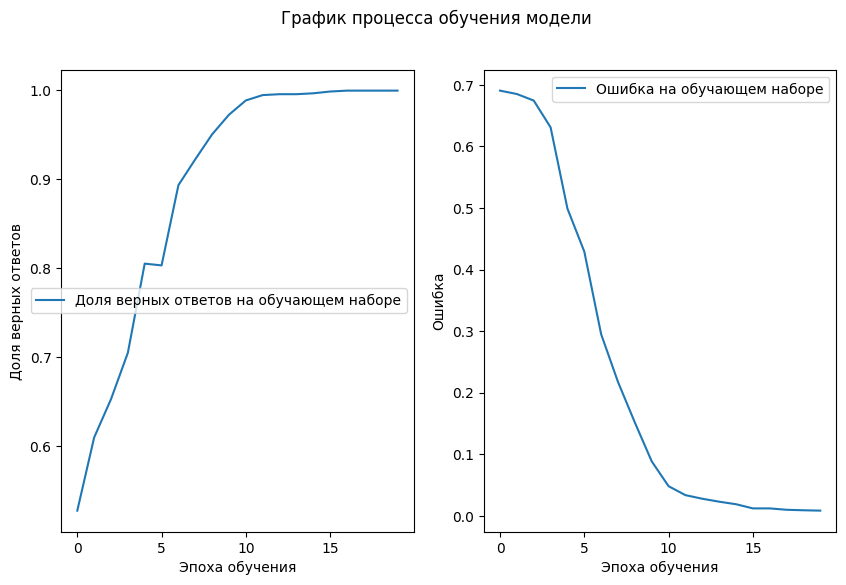

In [ ]:
# Вывод графиков точности и ошибки

figsize = (10, 6)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['accuracy'],label='Доля верных ответов на обучающем наборе')

ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля верных ответов')
ax1.legend()

ax2.plot(history.history['loss'],label='Ошибка на обучающем наборе')

ax2.xaxis.get_major_locator().set_params(integer=True)
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()
